<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Core-Independent-Project-Week-14/blob/main/Moringa_Core_Independent_Project_Week_14(Part_1_and_Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Research Question**
You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). In this part we are going to use Dimensionality Reduction and Feature selection to gain insights from the dataset that will help the marketing department.

#**Reading the dataset**

In [1]:
#Importing the library
#Reading the data
#Previewing the first six entries of the data.
library("data.table")
data = fread('http://bit.ly/CarreFourDataset')
head(data)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [2]:
#Previewing the last six entries of the dataset
tail(data)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


#**Checking the dataset**

In [3]:
#Checking the dimensions of the dataset.
dim(data)

[1] 1000   16

In [4]:
#Checking the structure of the data
str(data)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  16 variables:
 $ Invoice ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross margin percentage: num  4.76 4.7

In [5]:
#Removing white spaces from the column names
names(data)<-make.names(names(data),unique = TRUE)

In [6]:
#Assigning the correct data types to columns with wrong data types.
data$Branch <- as.factor(data$Branch)
data$Customer.type <- as.factor(data$Customer.type)
data$Gender <- as.factor(data$Gender)
data$Product.line <- as.factor(data$Product.line)
data$Payment <- as.factor(data$Payment)


In [7]:
# splitting the Date column into Day, Month, and Year columns, and storing the results as factors
data$Day <- as.factor(format(as.POSIXct(data$Date, format="%m/%d/%Y"), "%d"))
data$Month <- as.factor(format(as.POSIXct(data$Date, format="%m/%d/%Y"), "%m"))
data$Year <- as.factor(format(as.POSIXct(data$Date, format="%m/%d/%Y"), "%Y"))

# splitting the Time variable into Hour and Minute, and storing the results as factors
data$Hour <- as.factor(format(as.POSIXct(data$Time, format="%H:%M"), "%H"))
data$Minute <- as.factor(format(as.POSIXct(data$Time, format="%H:%M"), "%M"))

In [8]:
#Checking the column names.
names(data)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"                  
[17] "Day"                     "Month"                  
[19] "Year"                    "Hour"                   
[21] "Minute"

In [9]:
#Confirming if the variables have been assigned the correct data type
str(data)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  21 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 3

In [10]:
#Previewing the dataset
head(data)

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,⋯,cogs,gross.margin.percentage,gross.income,Rating,Total,Day,Month,Year,Hour,Minute
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,⋯,522.83,4.761905,26.1415,9.1,548.9715,05,01,2019,13,08
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,⋯,76.40,4.761905,3.8200,9.6,80.2200,08,03,2019,10,29
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,⋯,324.31,4.761905,16.2155,7.4,340.5255,03,03,2019,13,23
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,⋯,465.76,4.761905,23.2880,8.4,489.0480,27,01,2019,20,33
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,⋯,604.17,4.761905,30.2085,5.3,634.3785,08,02,2019,10,37
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,⋯,597.73,4.761905,29.8865,4.1,627.6165,25,03,2019,18,30


In [11]:
#Checking the number of columns in the dataset
ncol(data)

[1] 21

In [12]:
#Checking the number of rows in the dataset
nrow(data)

[1] 1000

#**Data Cleaning**

**Data Completeness**

In [13]:
#Finding the total missing values in each column
colSums(is.na(data))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total                     Day                   Month 
                      0                       0                       0 
                   Year                    Hour                  Minute 
                      0                       0                       0

There are no missing values in the dataset.

**Data Consistency**

In [14]:
#Checking for duplicates
anyDuplicated(data)

[1] 0

There are no duplicates in the dataset.

**Data Validity**

In [15]:
#Dropping unnecessary columns
data$Time <- NULL
data$Date <- NULL
data$Invoice.ID <- NULL
colnames(data)

[1] "Branch"                  "Customer.type"          
 [3] "Gender"                  "Product.line"           
 [5] "Unit.price"              "Quantity"               
 [7] "Tax"                     "Payment"                
 [9] "cogs"                    "gross.margin.percentage"
[11] "gross.income"            "Rating"                 
[13] "Total"                   "Day"                    
[15] "Month"                   "Year"                   
[17] "Hour"                    "Minute"

#**Dimensionality Reduction**

##**Principal Component Analysis(PCA)**

In [16]:
#Changing all variables to numeric
data_num <- data
data_num$Branch <- as.numeric(data_num$Branch)
data_num$Customer.type <- as.numeric(data_num$Customer.type)
data_num$Gender <- as.numeric(data_num$Gender)
data_num$Product.line <- as.numeric(data_num$Product.line)
data_num$Payment <- as.numeric(data_num$Payment)
data_num$Day <- as.numeric(data_num$Day)
data_num$Month <- as.numeric(data_num$Month)
data_num$Year <- as.numeric(data_num$Year)
data_num$Hour <- as.numeric(data_num$Hour)
data_num$Minute <- as.numeric(data_num$Minute)
data_num$Quantity <- as.numeric(data_num$Quantity)

In [17]:
#Confirming if the variables have been changed to numeric.
str(data_num)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  18 variables:
 $ Branch                 : num  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : num  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : num  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : num  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : num  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : num  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Day                    : num  5 8 3 27 8 25 25 24 10 20 ...
 $ Month                  : num  1 3 3 1 2 3 2 2 1 2 ...
 $ Year    

In [18]:
#Previewing the dataset
head(data_num)

Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Day,Month,Year,Hour,Minute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,4,74.69,7,26.1415,3,522.83,4.761905,26.1415,9.1,548.9715,5,1,1,4,9
3,2,1,1,15.28,5,3.8200,1,76.40,4.761905,3.8200,9.6,80.2200,8,3,1,1,30
1,2,2,5,46.33,7,16.2155,2,324.31,4.761905,16.2155,7.4,340.5255,3,3,1,4,24
1,1,2,4,58.22,8,23.2880,3,465.76,4.761905,23.2880,8.4,489.0480,27,1,1,11,34
1,2,2,6,86.31,7,30.2085,3,604.17,4.761905,30.2085,5.3,634.3785,8,2,1,1,38
3,2,2,1,85.39,7,29.8865,3,597.73,4.761905,29.8865,4.1,627.6165,25,3,1,9,31


In [19]:
#Checking the standard deviation of different variables.
sd(data_num$Branch)
sd(data_num$Customer.type)
sd(data_num$Gender)
sd(data_num$Product.line)
sd(data_num$Payment)
sd(data_num$Unit.price)
sd(data_num$Quantity)
sd(data_num$Tax)
sd(data_num$Total)
sd(data_num$Day)
sd(data_num$Month)
sd(data_num$Minute)
sd(data_num$Year)
sd(data_num$Hour)
sd(data_num$cogs)
sd(data_num$gross.income)
sd(data_num$gross.margin.percentage)
sd(data_num$Rating)

[1] 0.8176335

[1] 0.5002492

[1] 0.5002492

[1] 1.715412

[1] 0.830475

[1] 26.49463

[1] 2.923431

[1] 11.70883

[1] 245.8853

[1] 8.693563

[1] 0.8352536

[1] 16.88068

[1] 0

[1] 3.186857

[1] 234.1765

[1] 11.70883

[1] 0

[1] 1.71858

In [20]:
#Dropping variables which have a standard deviation of 0
data_num$gross.margin.percentage <- NULL
data_num$Year <- NULL

In [21]:
# We then pass data to the prcomp(). We also set two arguments, center and scale, 
# to be TRUE then preview our object with summary
data.pca <- prcomp(data_num, center = TRUE, scale. = TRUE)
summary(data.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2205 1.0874 1.08282 1.05002 1.02123 1.01763 0.99088
Proportion of Variance 0.3081 0.0739 0.07328 0.06891 0.06518 0.06472 0.06136
Cumulative Proportion  0.3081 0.3821 0.45533 0.52424 0.58942 0.65414 0.71551
                          PC8    PC9    PC10    PC11    PC12   PC13      PC14
Standard deviation     0.9757 0.9641 0.95863 0.92025 0.90270 0.2994 2.718e-16
Proportion of Variance 0.0595 0.0581 0.05744 0.05293 0.05093 0.0056 0.000e+00
Cumulative Proportion  0.7750 0.8331 0.89054 0.94347 0.99440 1.0000 1.000e+00
                          PC15      PC16
Standard deviation     1.8e-16 9.964e-17
Proportion of Variance 0.0e+00 0.000e+00
Cumulative Proportion  1.0e+00 1.000e+00

PC1 explains 30.81% of the total variance and PC2 explains 7.39% of the total variance.

In [22]:
# Calling str() to have a look at your PCA object
str(data.pca)

List of 5
 $ sdev    : num [1:16] 2.22 1.09 1.08 1.05 1.02 ...
 $ rotation: num [1:16, 1:16] 0.0224 -0.0125 -0.0283 0.0174 0.2911 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:16] 1.99 1.5 1.5 3.45 55.67 ...
  ..- attr(*, "names")= chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ scale   : Named num [1:16] 0.818 0.5 0.5 1.715 26.495 ...
  ..- attr(*, "names")= chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ x       : num [1:1000, 1:16] 2.05 -2.287 0.126 1.466 2.743 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


Loading required package: usethis

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation

Loading required package: ggplot2

Loading required package: plyr

Loading required package: scales

Loading required package: grid



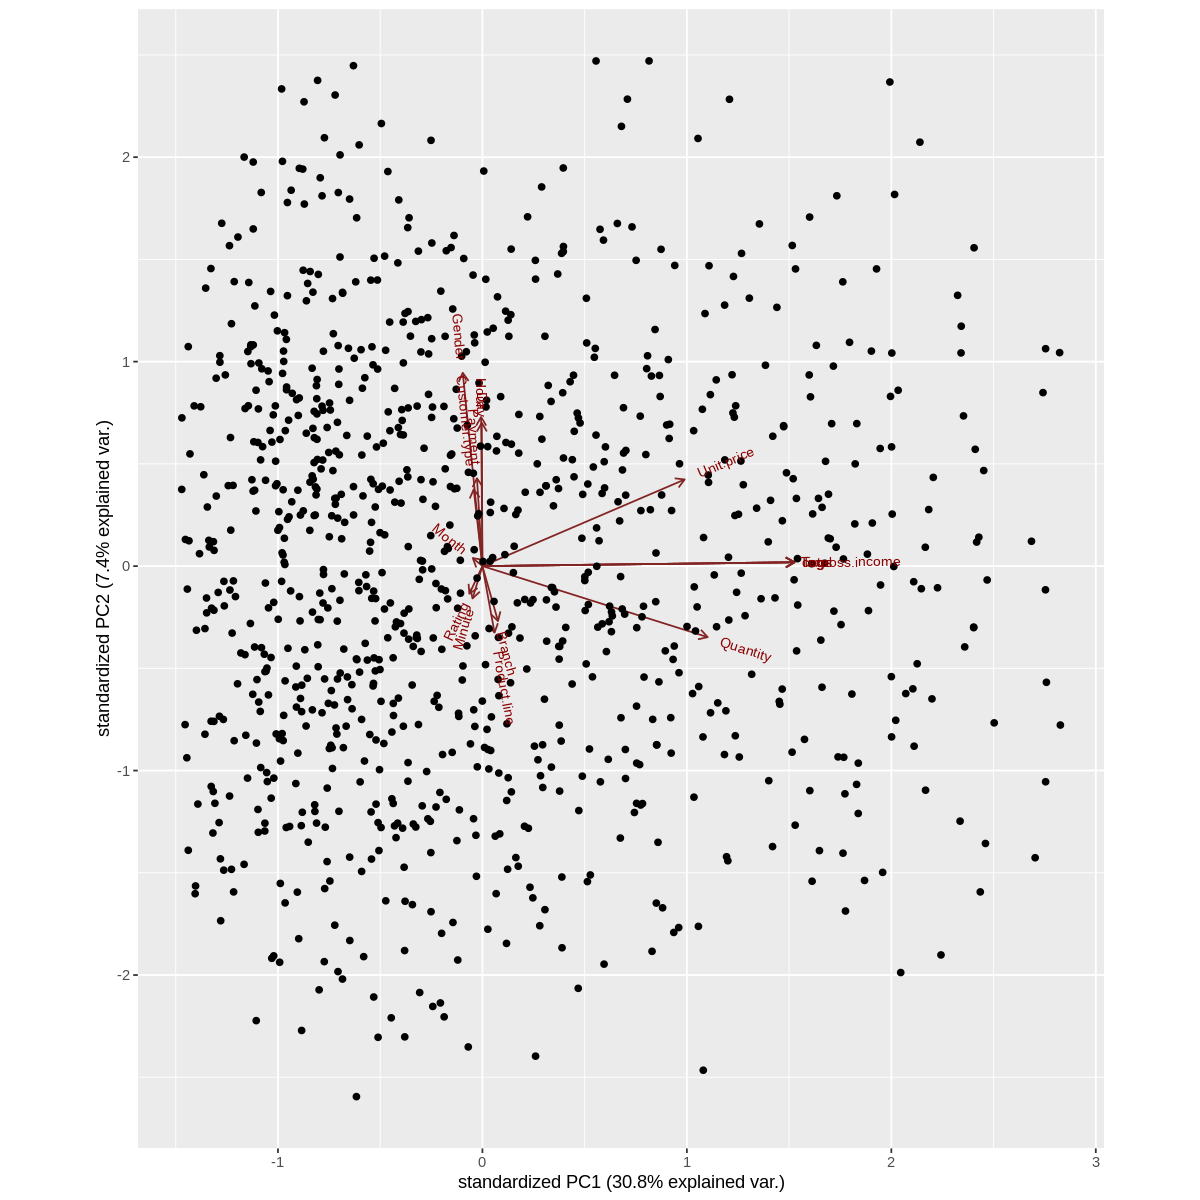

In [23]:
# Installing our ggbiplot visualisation package
# 
library(devtools)
install_github("vqv/ggbiplot")
# Then Loading our ggbiplot library
#  
library(ggbiplot)
options(repr.plot.width = 10, repr.plot.height = 10)
ggbiplot(data.pca)

We can observe that unit price, total income and quantity contribute to PCA1.

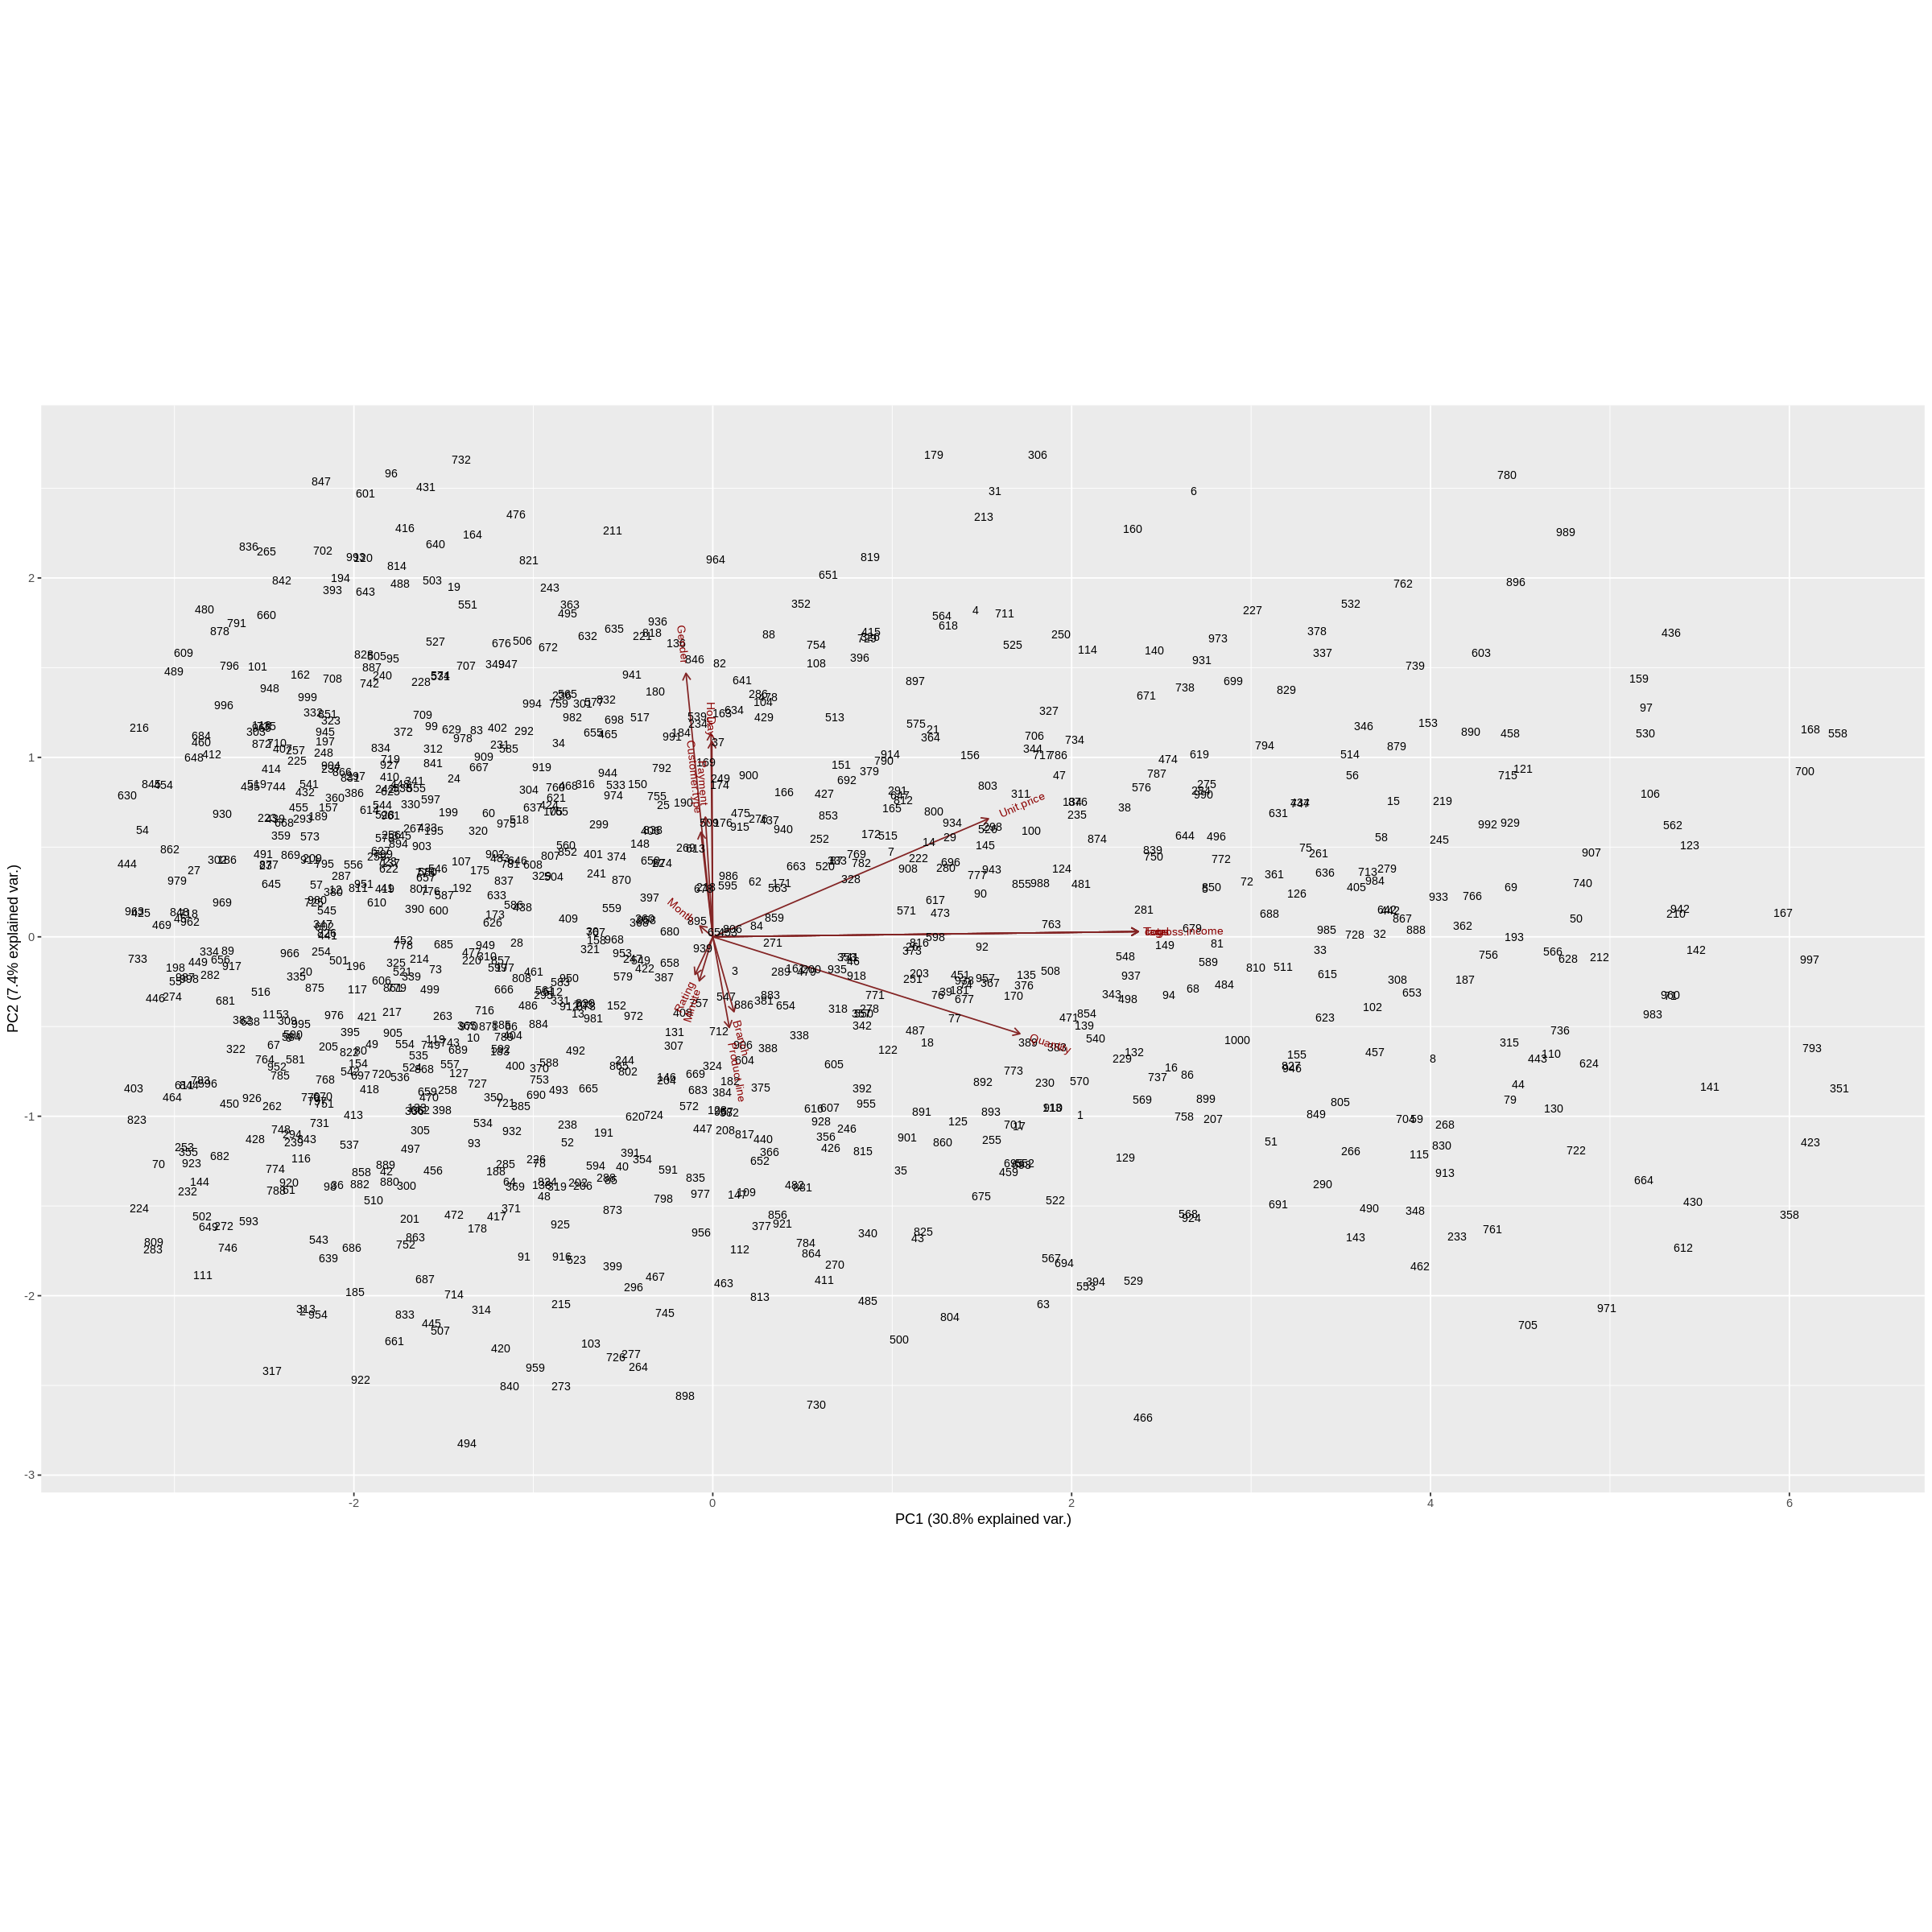

In [24]:
# Adding more detail to the plot, we provide arguments rownames as labels
# 
options(repr.plot.width = 20, repr.plot.height = 20)
ggbiplot(data.pca, labels=rownames(data), obs.scale = 1, var.scale = 1)

##**t-Distributed Stochastic Neighbor Embedding (t-SNE)**

In [25]:
# Installing Rtnse package
# 
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
# Loading our tnse library
# 
library(Rtsne)

In [27]:
# Curating the database for analysis 
# Using Branch as the factor.
data_branch <- data_num
data_branch$Branch<-as.factor(data_branch$Branch)

# For plotting
#
colors = rainbow(length(unique(data_branch$Branch)))
names(colors) = unique(data_branch$Branch)

In [28]:
# Executing the algorithm on curated data
tsne <- Rtsne(data_branch[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
# Getting the duration of execution
exeTimeTsne <- system.time(Rtsne(data_branch[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))

Performing PCA
Read the 1000 x 15 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.09 seconds (sparsity = 0.101692)!
Learning embedding...
Iteration 50: error is 62.372482 (50 iterations in 0.14 seconds)
Iteration 100: error is 54.432705 (50 iterations in 0.12 seconds)
Iteration 150: error is 52.730028 (50 iterations in 0.12 seconds)
Iteration 200: error is 52.196947 (50 iterations in 0.12 seconds)
Iteration 250: error is 51.971683 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.721679 (50 iterations in 0.13 seconds)
Iteration 350: error is 0.551896 (50 iterations in 0.13 seconds)
Iteration 400: error is 0.510869 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.495838 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.482765 (50 iterations in 0.12 seconds)
Fitting performed in 1.24 seconds.
Performing PCA
Read the 1000 x 15 data mat

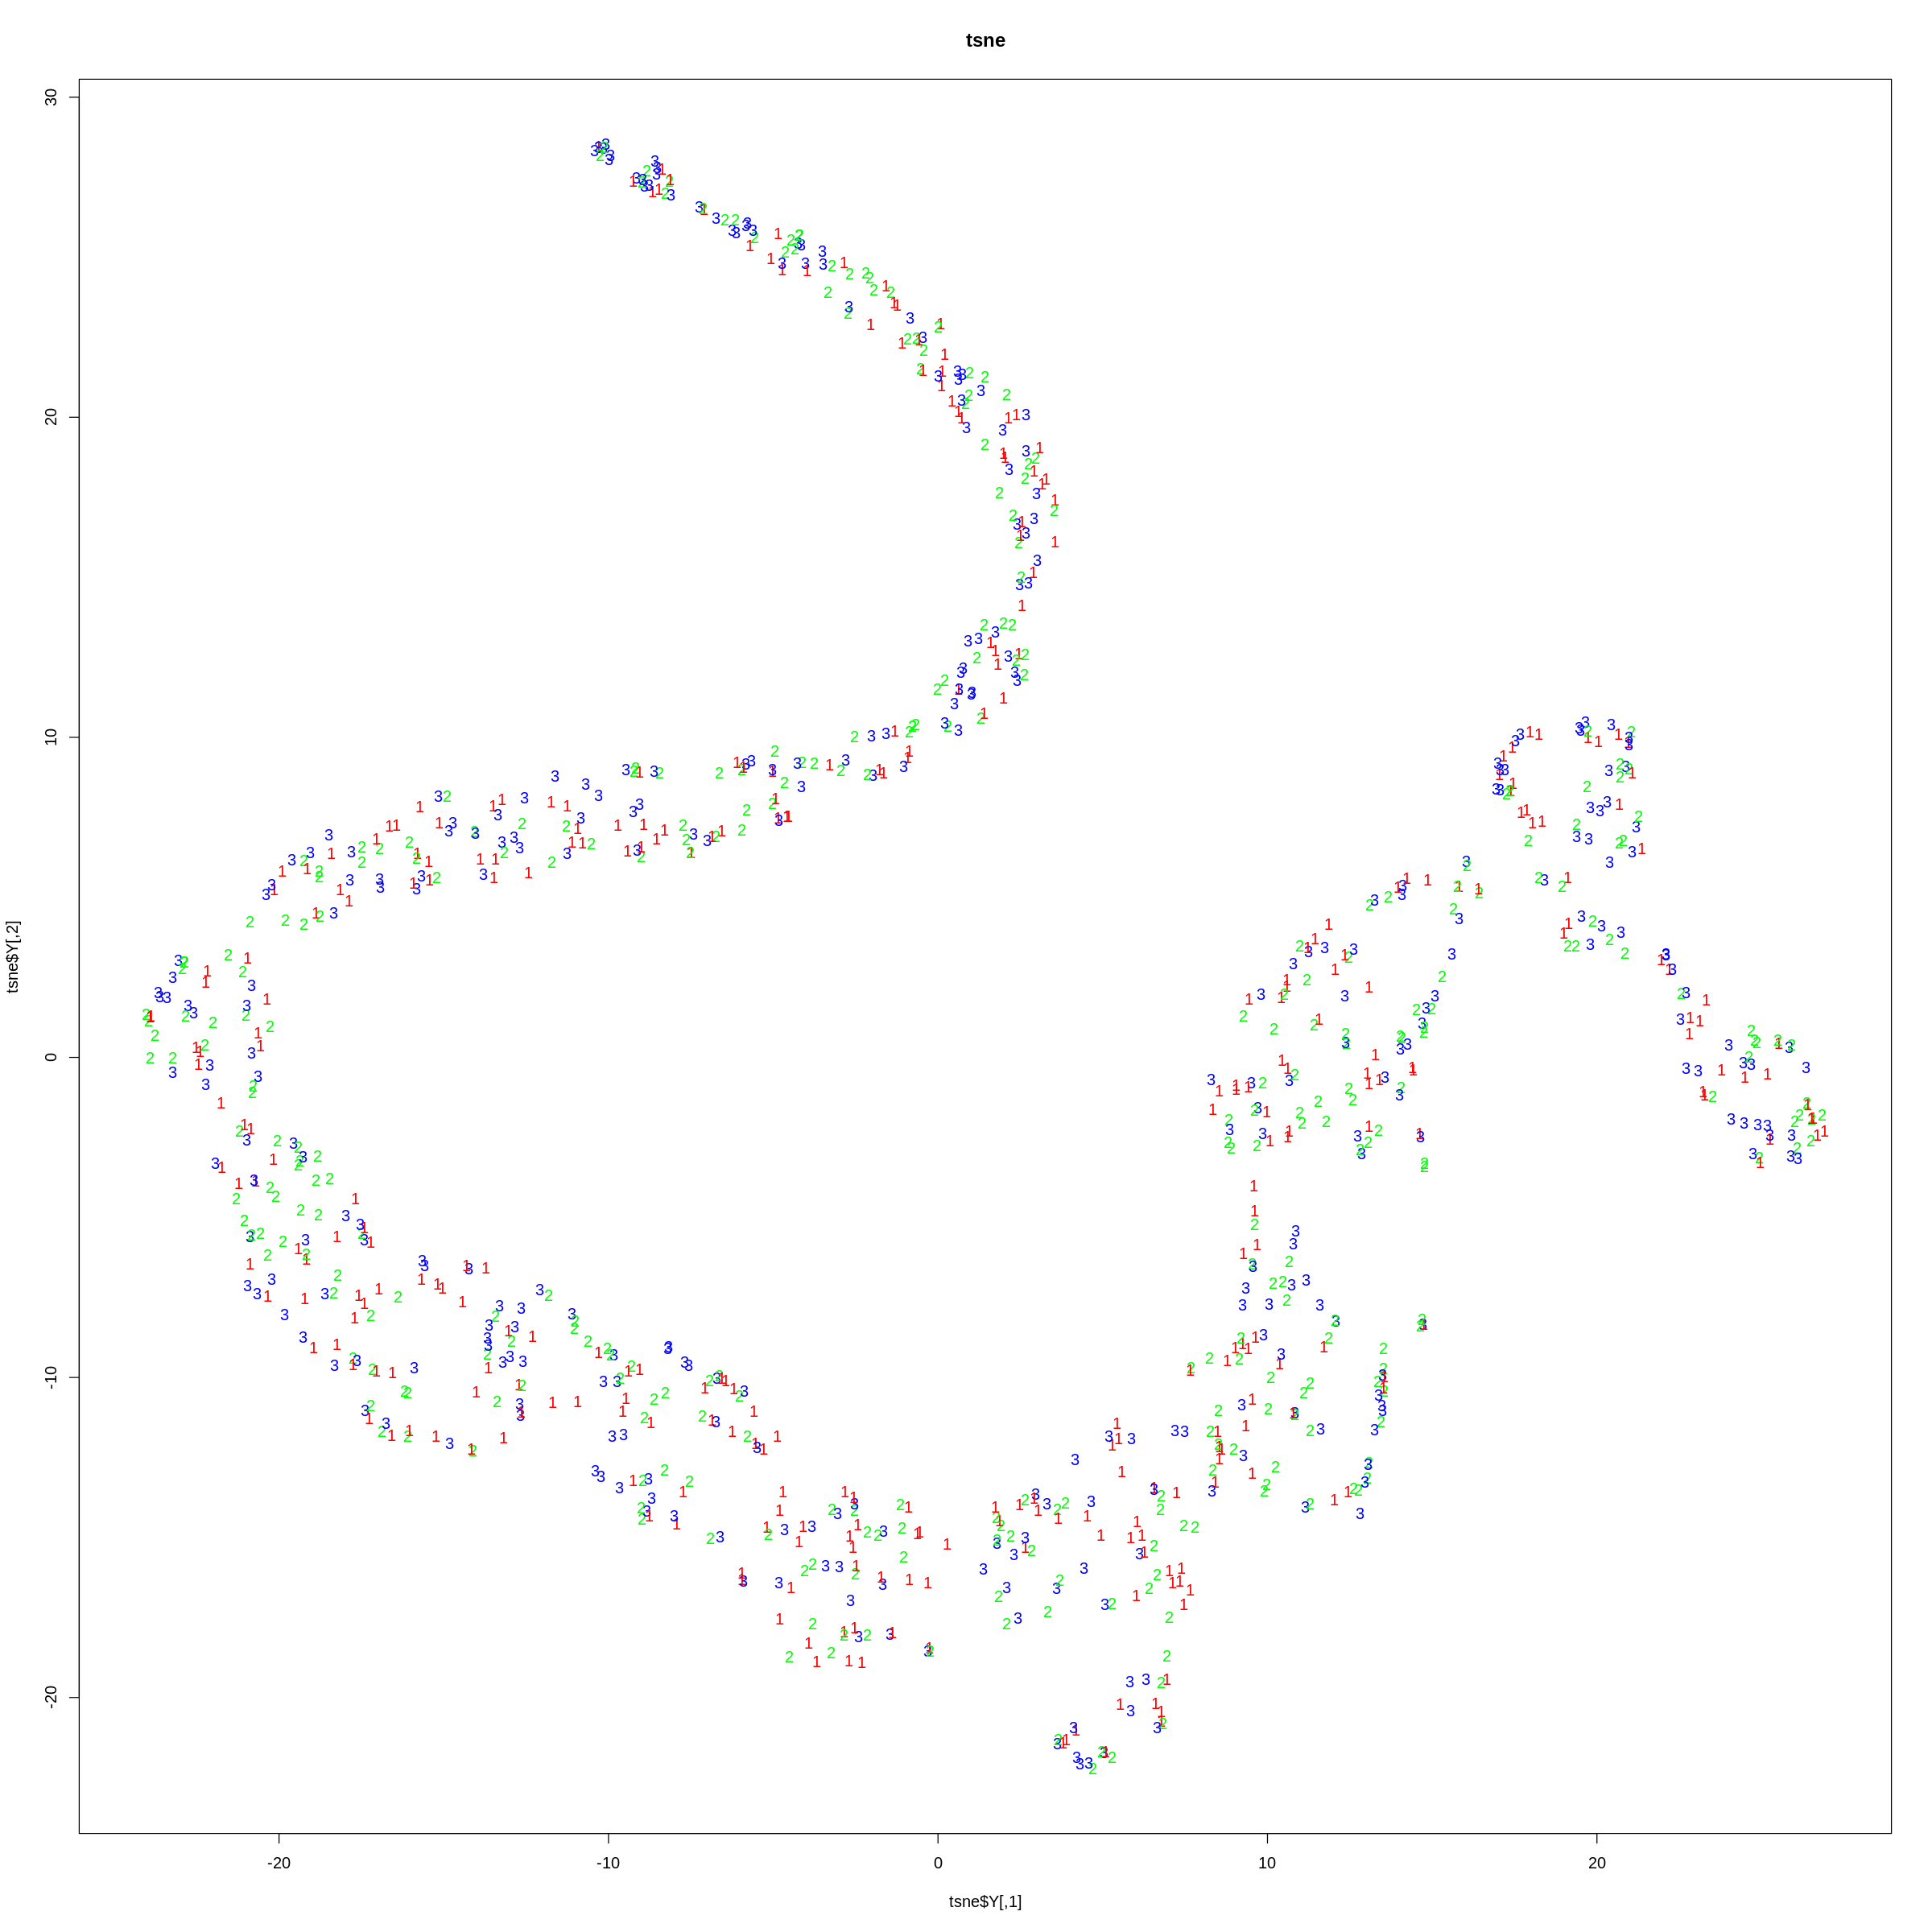

In [29]:
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=data_branch$Branch, col=colors[data_branch$Branch])

Performing PCA
Read the 1000 x 16 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.101690)!
Learning embedding...
Iteration 50: error is 59.719346 (50 iterations in 0.17 seconds)
Iteration 100: error is 53.262406 (50 iterations in 0.12 seconds)
Iteration 150: error is 52.106377 (50 iterations in 0.13 seconds)
Iteration 200: error is 51.936827 (50 iterations in 0.12 seconds)
Iteration 250: error is 51.882192 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.726821 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.558792 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.503112 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.482595 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.471203 (50 iterations in 0.12 seconds)
Fitting performed in 1.27 seconds.
Performing PCA
Read the 1000 x 16 data mat

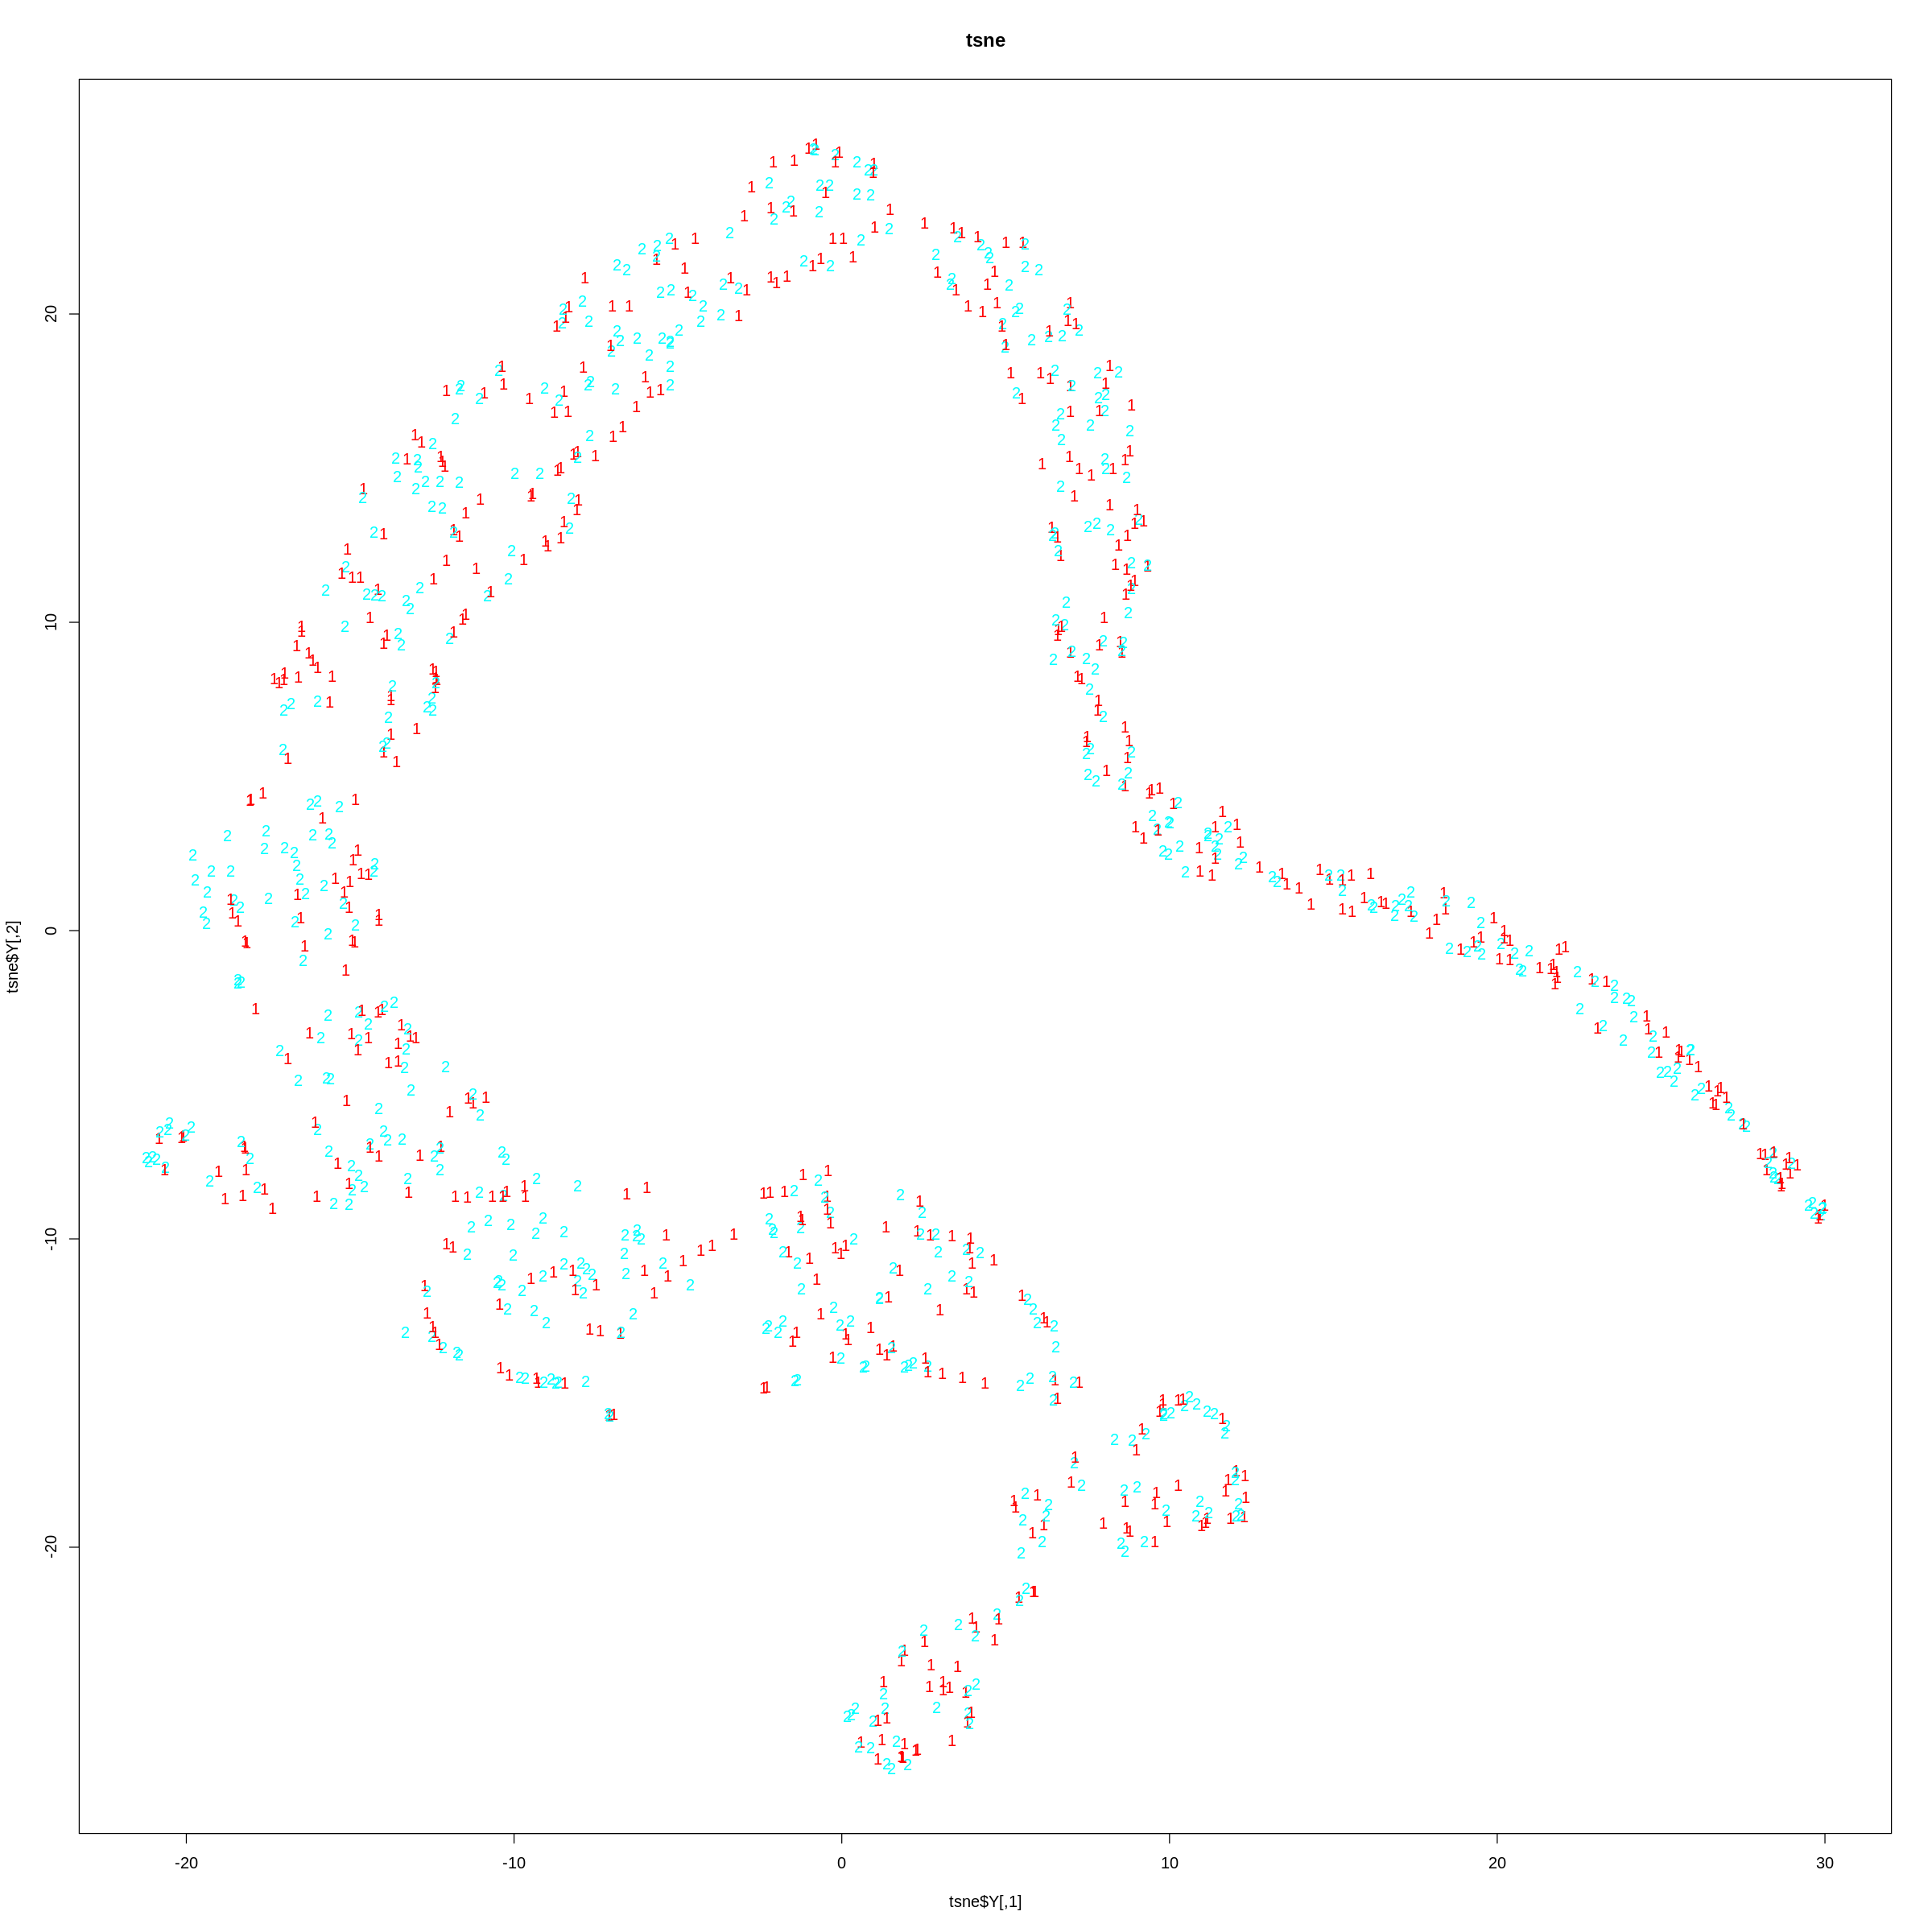

In [30]:
# Curating the database for analysis 
# Using Customer.type as the factor.
data_customer <- data_num
data_customer$Customer.type<-as.factor(data_customer$Customer.type)

# For plotting
#
colors = rainbow(length(unique(data_customer$Customer.type)))
names(colors) = unique(data_customer$Customer.type)

# Executing the algorithm on curated data
tsne <- Rtsne(data_customer[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
# Getting the duration of execution
exeTimeTsne <- system.time(Rtsne(data_customer[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=data_customer$Customer.type, col=colors[data_customer$Customer.type])

Performing PCA
Read the 1000 x 16 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.101690)!
Learning embedding...
Iteration 50: error is 61.095923 (50 iterations in 0.16 seconds)
Iteration 100: error is 55.139503 (50 iterations in 0.13 seconds)
Iteration 150: error is 54.315604 (50 iterations in 0.12 seconds)
Iteration 200: error is 54.168860 (50 iterations in 0.12 seconds)
Iteration 250: error is 53.993080 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.733152 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.570569 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.533456 (50 iterations in 0.13 seconds)
Iteration 450: error is 0.514979 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.502814 (50 iterations in 0.13 seconds)
Fitting performed in 1.26 seconds.
Performing PCA
Read the 1000 x 16 data mat

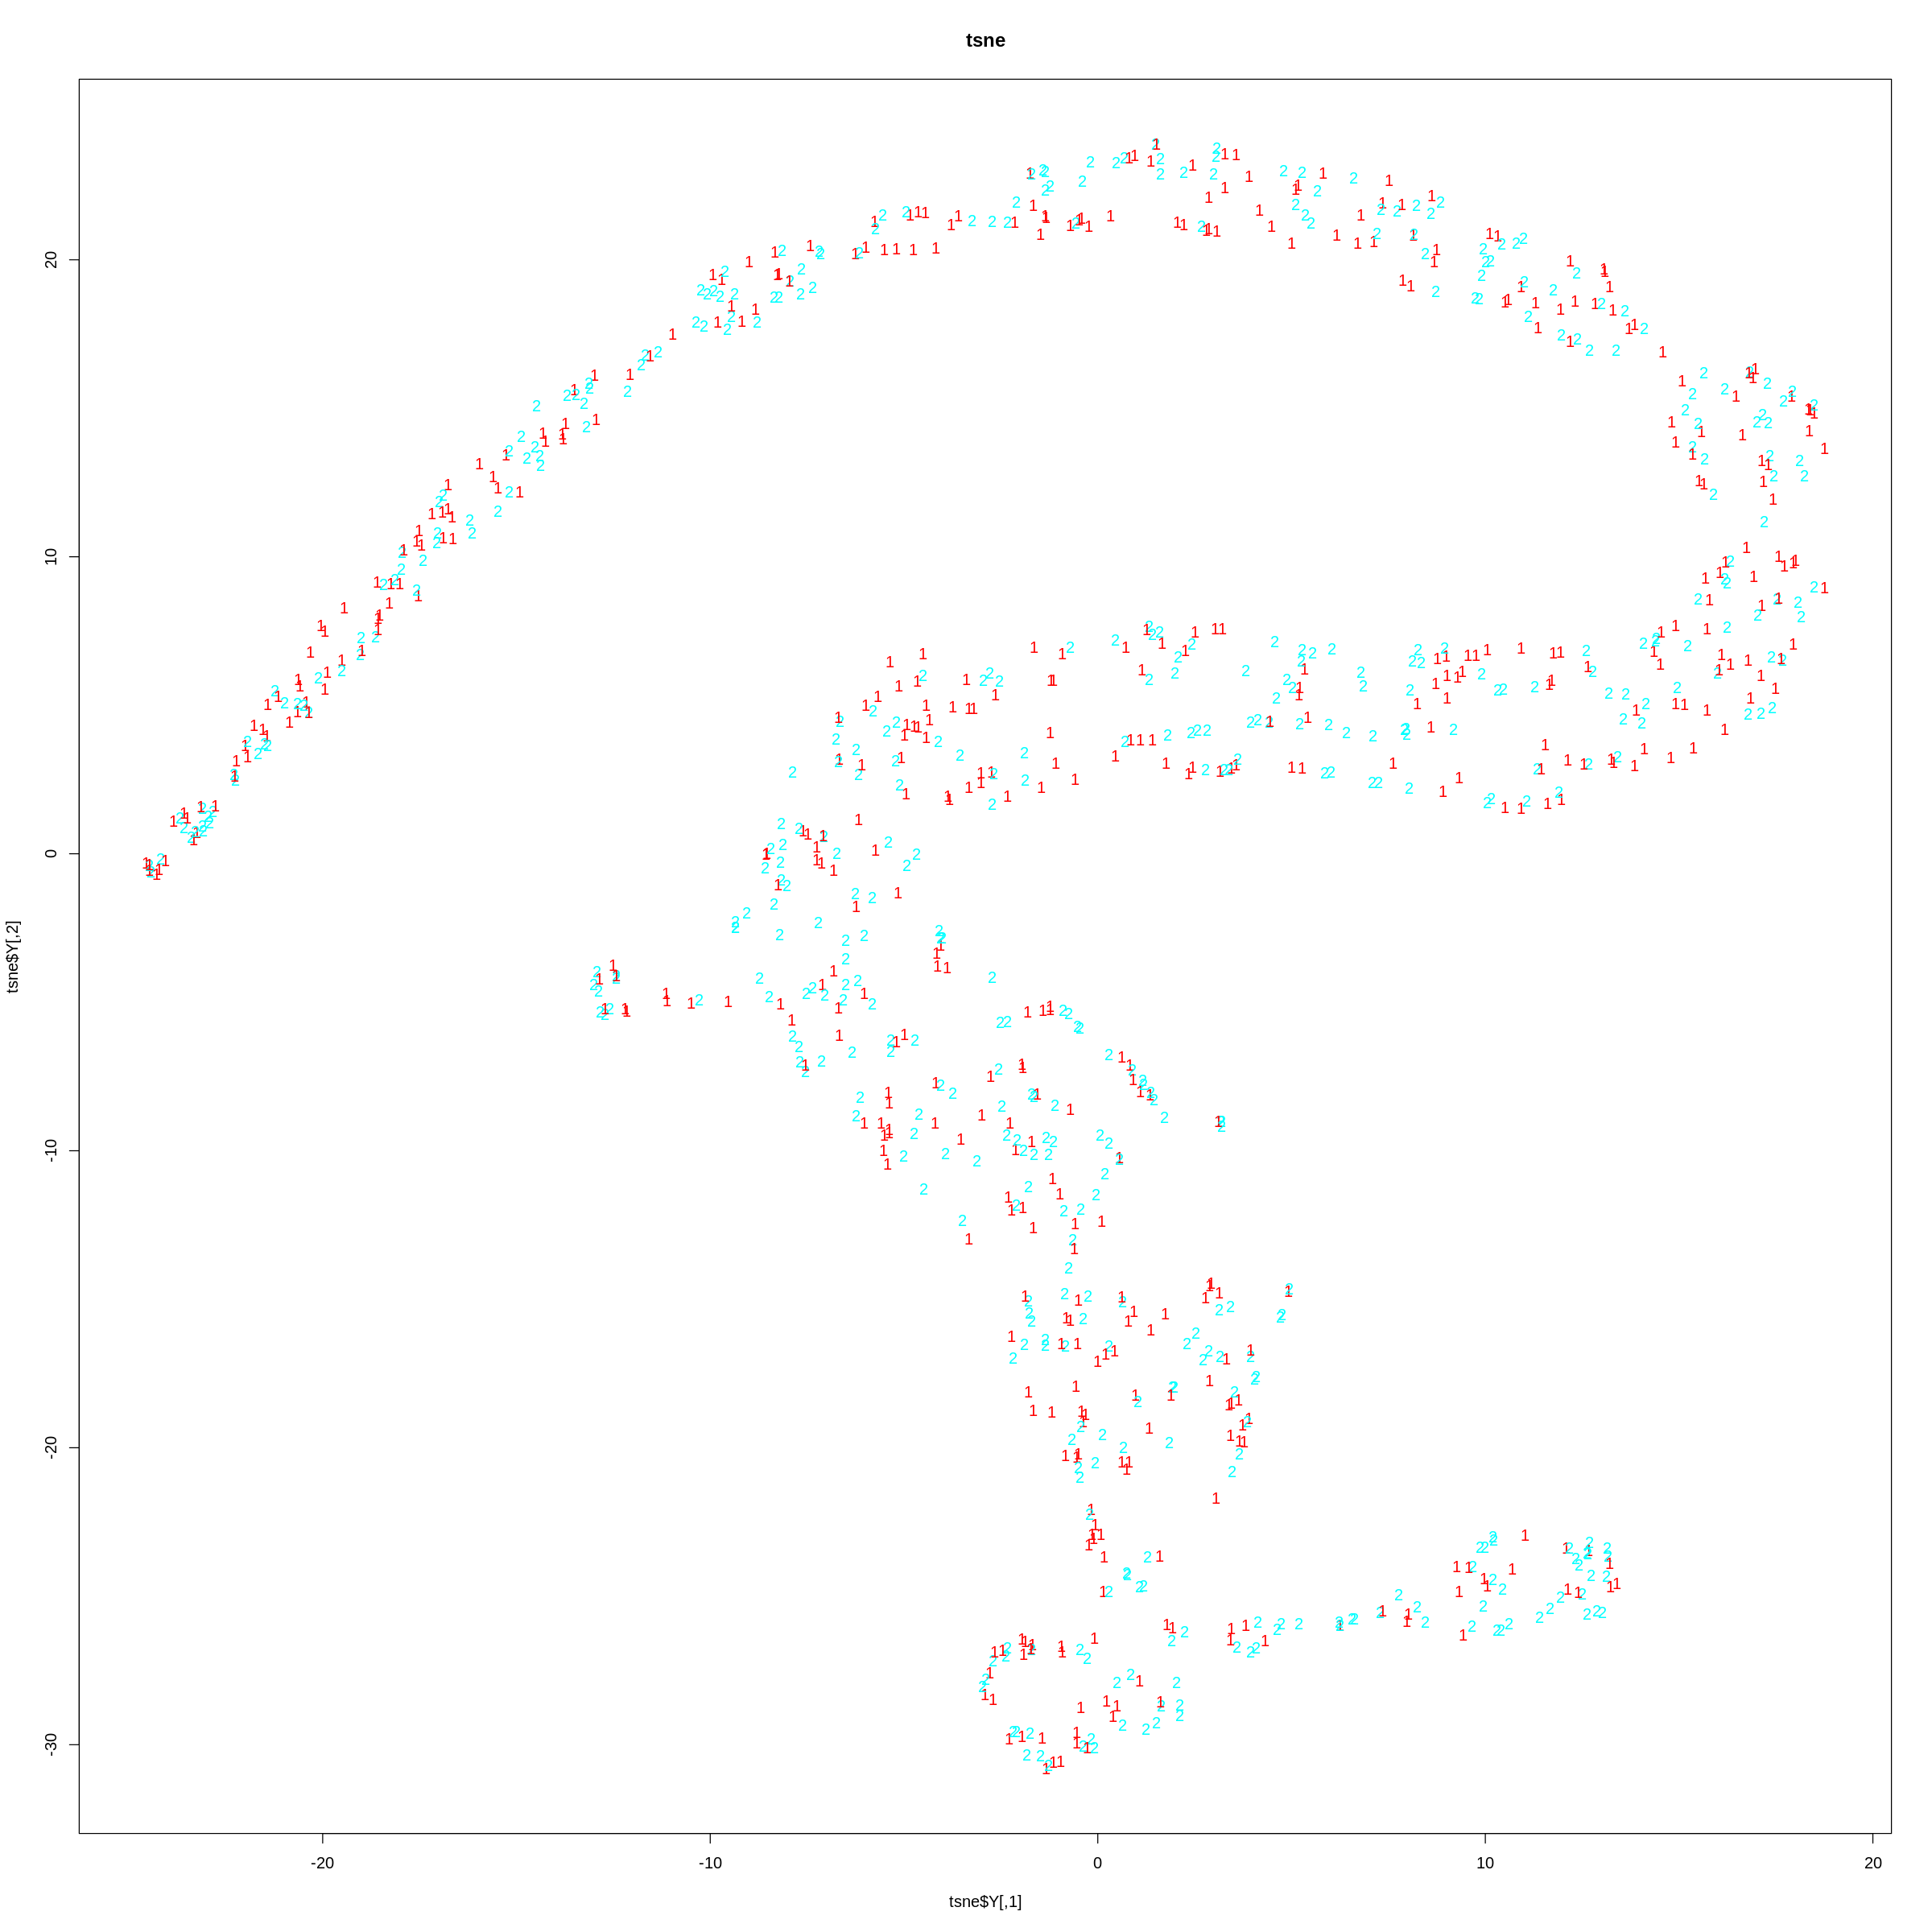

In [31]:
# Curating the database for analysis 
# Using Gender as the factor.
data_gender <- data_num
data_gender$Gender<-as.factor(data_gender$Gender)

# For plotting
#
colors = rainbow(length(unique(data_gender$Gender)))
names(colors) = unique(data_gender$Gender)

# Executing the algorithm on curated data
tsne <- Rtsne(data_gender[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
# Getting the duration of execution
exeTimeTsne <- system.time(Rtsne(data_gender[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=data_gender$Gender, col=colors[data_gender$Gender])

Performing PCA
Read the 1000 x 20 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.101696)!
Learning embedding...
Iteration 50: error is 60.890808 (50 iterations in 0.22 seconds)
Iteration 100: error is 53.697272 (50 iterations in 0.13 seconds)
Iteration 150: error is 52.663975 (50 iterations in 0.13 seconds)
Iteration 200: error is 52.262161 (50 iterations in 0.14 seconds)
Iteration 250: error is 52.032922 (50 iterations in 0.13 seconds)
Iteration 300: error is 0.717534 (50 iterations in 0.13 seconds)
Iteration 350: error is 0.562818 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.529328 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.512526 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.499018 (50 iterations in 0.12 seconds)
Fitting performed in 1.35 seconds.
Performing PCA
Read the 1000 x 20 data mat

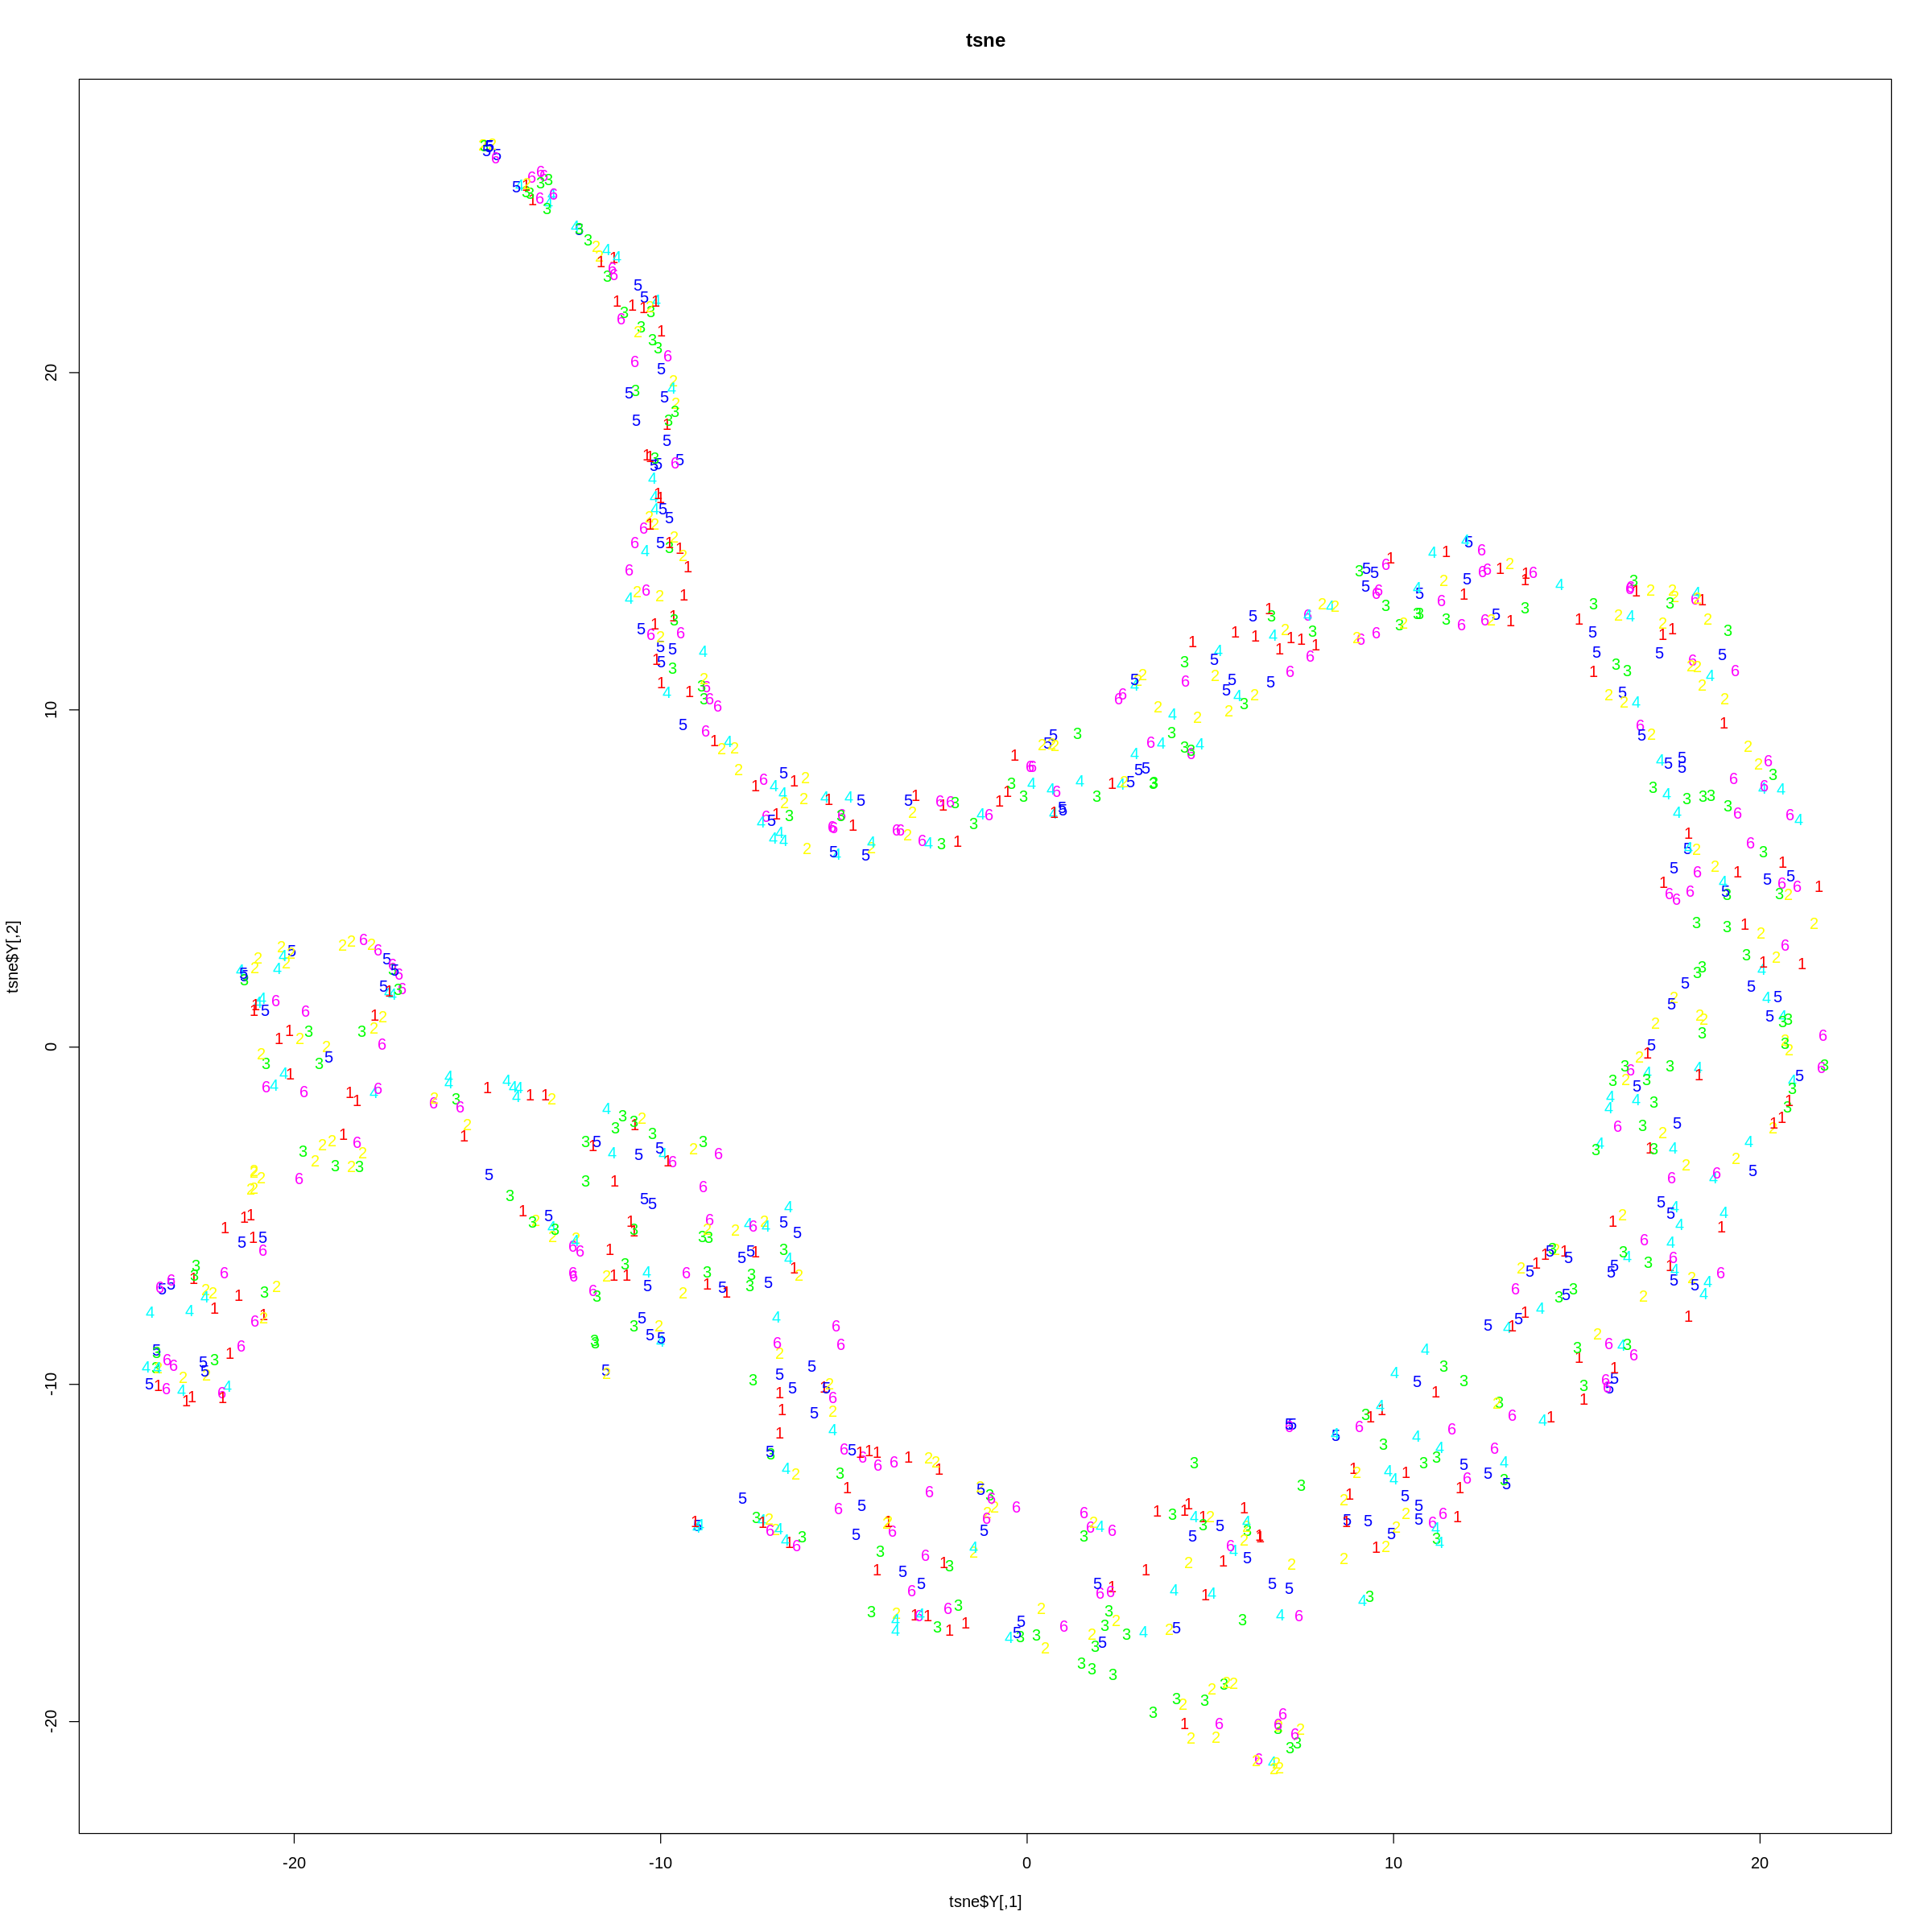

In [32]:
# Curating the database for analysis 
# Using Product.line as the factor.
data_product <- data_num
data_product$Product.line<-as.factor(data_product$Product.line)

# For plotting
#
colors = rainbow(length(unique(data_product$Product.line)))
names(colors) = unique(data_product$Product.line)

# Executing the algorithm on curated data
tsne <- Rtsne(data_product[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
# Getting the duration of execution
exeTimeTsne <- system.time(Rtsne(data_product[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=data_product$Product.line, col=colors[data_product$Product.line])

Performing PCA
Read the 1000 x 17 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.12 seconds (sparsity = 0.101688)!
Learning embedding...
Iteration 50: error is 60.386929 (50 iterations in 0.15 seconds)
Iteration 100: error is 53.842377 (50 iterations in 0.13 seconds)
Iteration 150: error is 52.982208 (50 iterations in 0.12 seconds)
Iteration 200: error is 52.628559 (50 iterations in 0.12 seconds)
Iteration 250: error is 52.470733 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.698739 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.546852 (50 iterations in 0.11 seconds)
Iteration 400: error is 0.508997 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.490666 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.478308 (50 iterations in 0.11 seconds)
Fitting performed in 1.21 seconds.
Performing PCA
Read the 1000 x 17 data mat

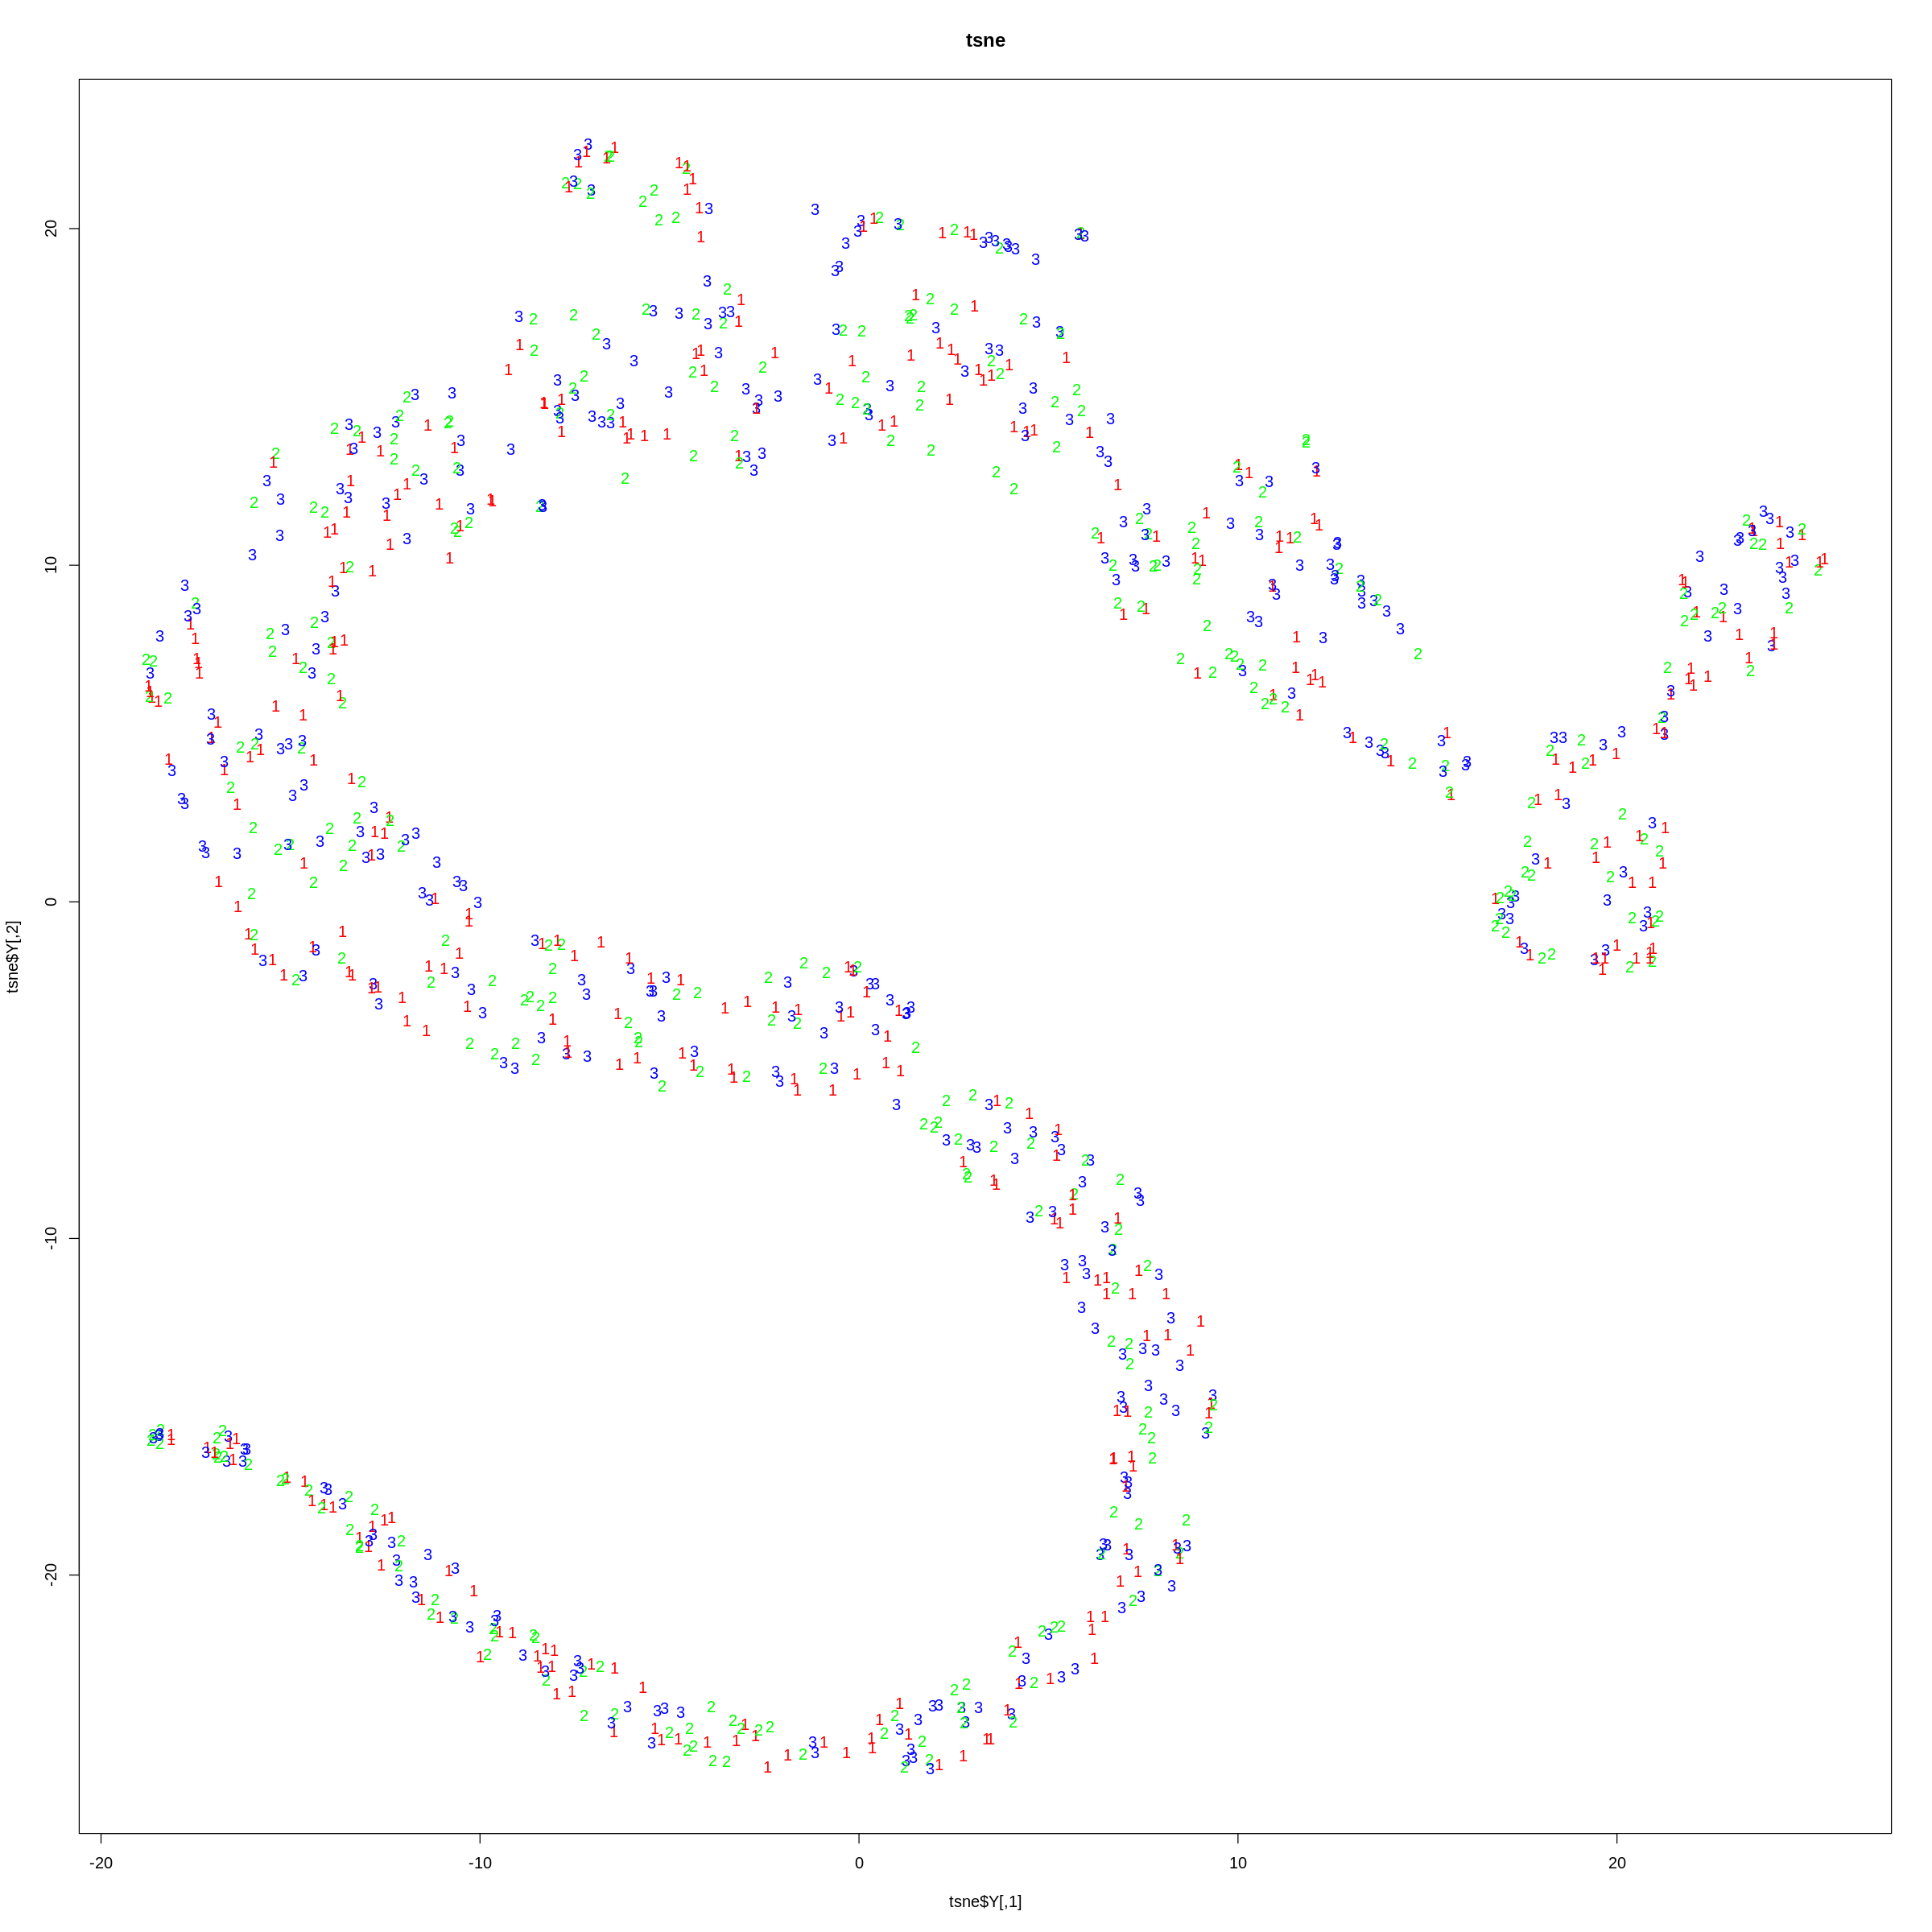

In [33]:
# Curating the database for analysis 
# Using Payment as the factor.
data_payment <- data_num
data_payment$Payment<-as.factor(data_payment$Payment)

# For plotting
#
colors = rainbow(length(unique(data_payment$Payment)))
names(colors) = unique(data_payment$Payment)

# Executing the algorithm on curated data
tsne <- Rtsne(data_payment[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)
# Getting the duration of execution
exeTimeTsne <- system.time(Rtsne(data_payment[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=data_payment$Payment, col=colors[data_payment$Payment])

#**Feature Selection**

##**Filter Method**

In [34]:
# Installing and loading our caret package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

In [35]:
# Installing and loading the corrplot package for plotting
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(corrplot, quietly=TRUE))
                install.packages("corrplot")))
library(corrplot)

In [36]:
# Calculating the correlation matrix
correlationMatrix <- cor(data_num)
correlationMatrix

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total,Day,Month,Hour,Minute
Branch,1.00000000,-0.019607869,-0.056317558,-0.053937557,0.028202440,0.015963788,0.04104666,-0.050104288,0.04104666,0.04104666,0.010238476,0.04104666,-0.013086533,-0.035300925,0.033007115,0.038378328
Customer.type,-0.01960787,1.000000000,0.039996160,-0.036800311,-0.020237875,-0.016762706,-0.01967028,0.018073436,-0.01967028,-0.01967028,0.018888672,-0.01967028,0.034124208,0.005972443,-0.018893298,-0.012909043
Gender,-0.05631756,0.039996160,1.000000000,0.005193197,0.015444630,-0.074258307,-0.04945099,0.044577609,-0.04945099,-0.04945099,0.004800208,-0.04945099,0.051156850,0.027533609,0.084081139,0.009257593
Product.line,-0.05393756,-0.036800311,0.005193197,1.000000000,0.019321028,0.020256001,0.03162072,0.029896383,0.03162072,0.03162072,-0.020528973,0.03162072,-0.050926658,-0.026433391,-0.060849916,0.018725704
Unit.price,0.02820244,-0.020237875,0.015444630,0.019321028,1.000000000,0.010777564,0.63396209,-0.015941048,0.63396209,0.63396209,-0.008777507,0.63396209,0.057020896,-0.027387186,0.008242210,-0.006868818
Quantity,0.01596379,-0.016762706,-0.074258307,0.020256001,0.010777564,1.000000000,0.70551019,-0.003920990,0.70551019,0.70551019,-0.015814905,0.70551019,-0.043346859,-0.014524276,-0.007316886,-0.014928556
Tax,0.04104666,-0.019670283,-0.049450989,0.031620725,0.633962089,0.705510186,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899
Payment,-0.05010429,0.018073436,0.044577609,0.029896383,-0.015941048,-0.003920990,-0.01243364,1.000000000,-0.01243364,-0.01243364,-0.005381289,-0.01243364,-0.004333547,0.031757801,0.045420537,0.000421422
cogs,0.04104666,-0.019670283,-0.049450989,0.031620725,0.633962089,0.705510186,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899
gross.income,0.04104666,-0.019670283,-0.049450989,0.031620725,0.633962089,0.705510186,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899


In [37]:
# Find attributes that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)
highlyCorrelated

[1]  9 12  7

Variables number 7, 9 and 12 are highly correlated.

In [38]:
#Checking the names of the highly correlated variables.
names(data_num[,..highlyCorrelated])

[1] "cogs"  "Total" "Tax"

In [39]:
# Removing Redundant Features 
data_filtered<-data_num[,-..highlyCorrelated]
head(data_filtered)



Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Payment,gross.income,Rating,Day,Month,Hour,Minute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,4,74.69,7,3,26.1415,9.1,5,1,4,9
3,2,1,1,15.28,5,1,3.8200,9.6,8,3,1,30
1,2,2,5,46.33,7,2,16.2155,7.4,3,3,4,24
1,1,2,4,58.22,8,3,23.2880,8.4,27,1,11,34
1,2,2,6,86.31,7,3,30.2085,5.3,8,2,1,38
3,2,2,1,85.39,7,3,29.8865,4.1,25,3,9,31


Dropping variables cogs, total and tax since they are highly correlated.

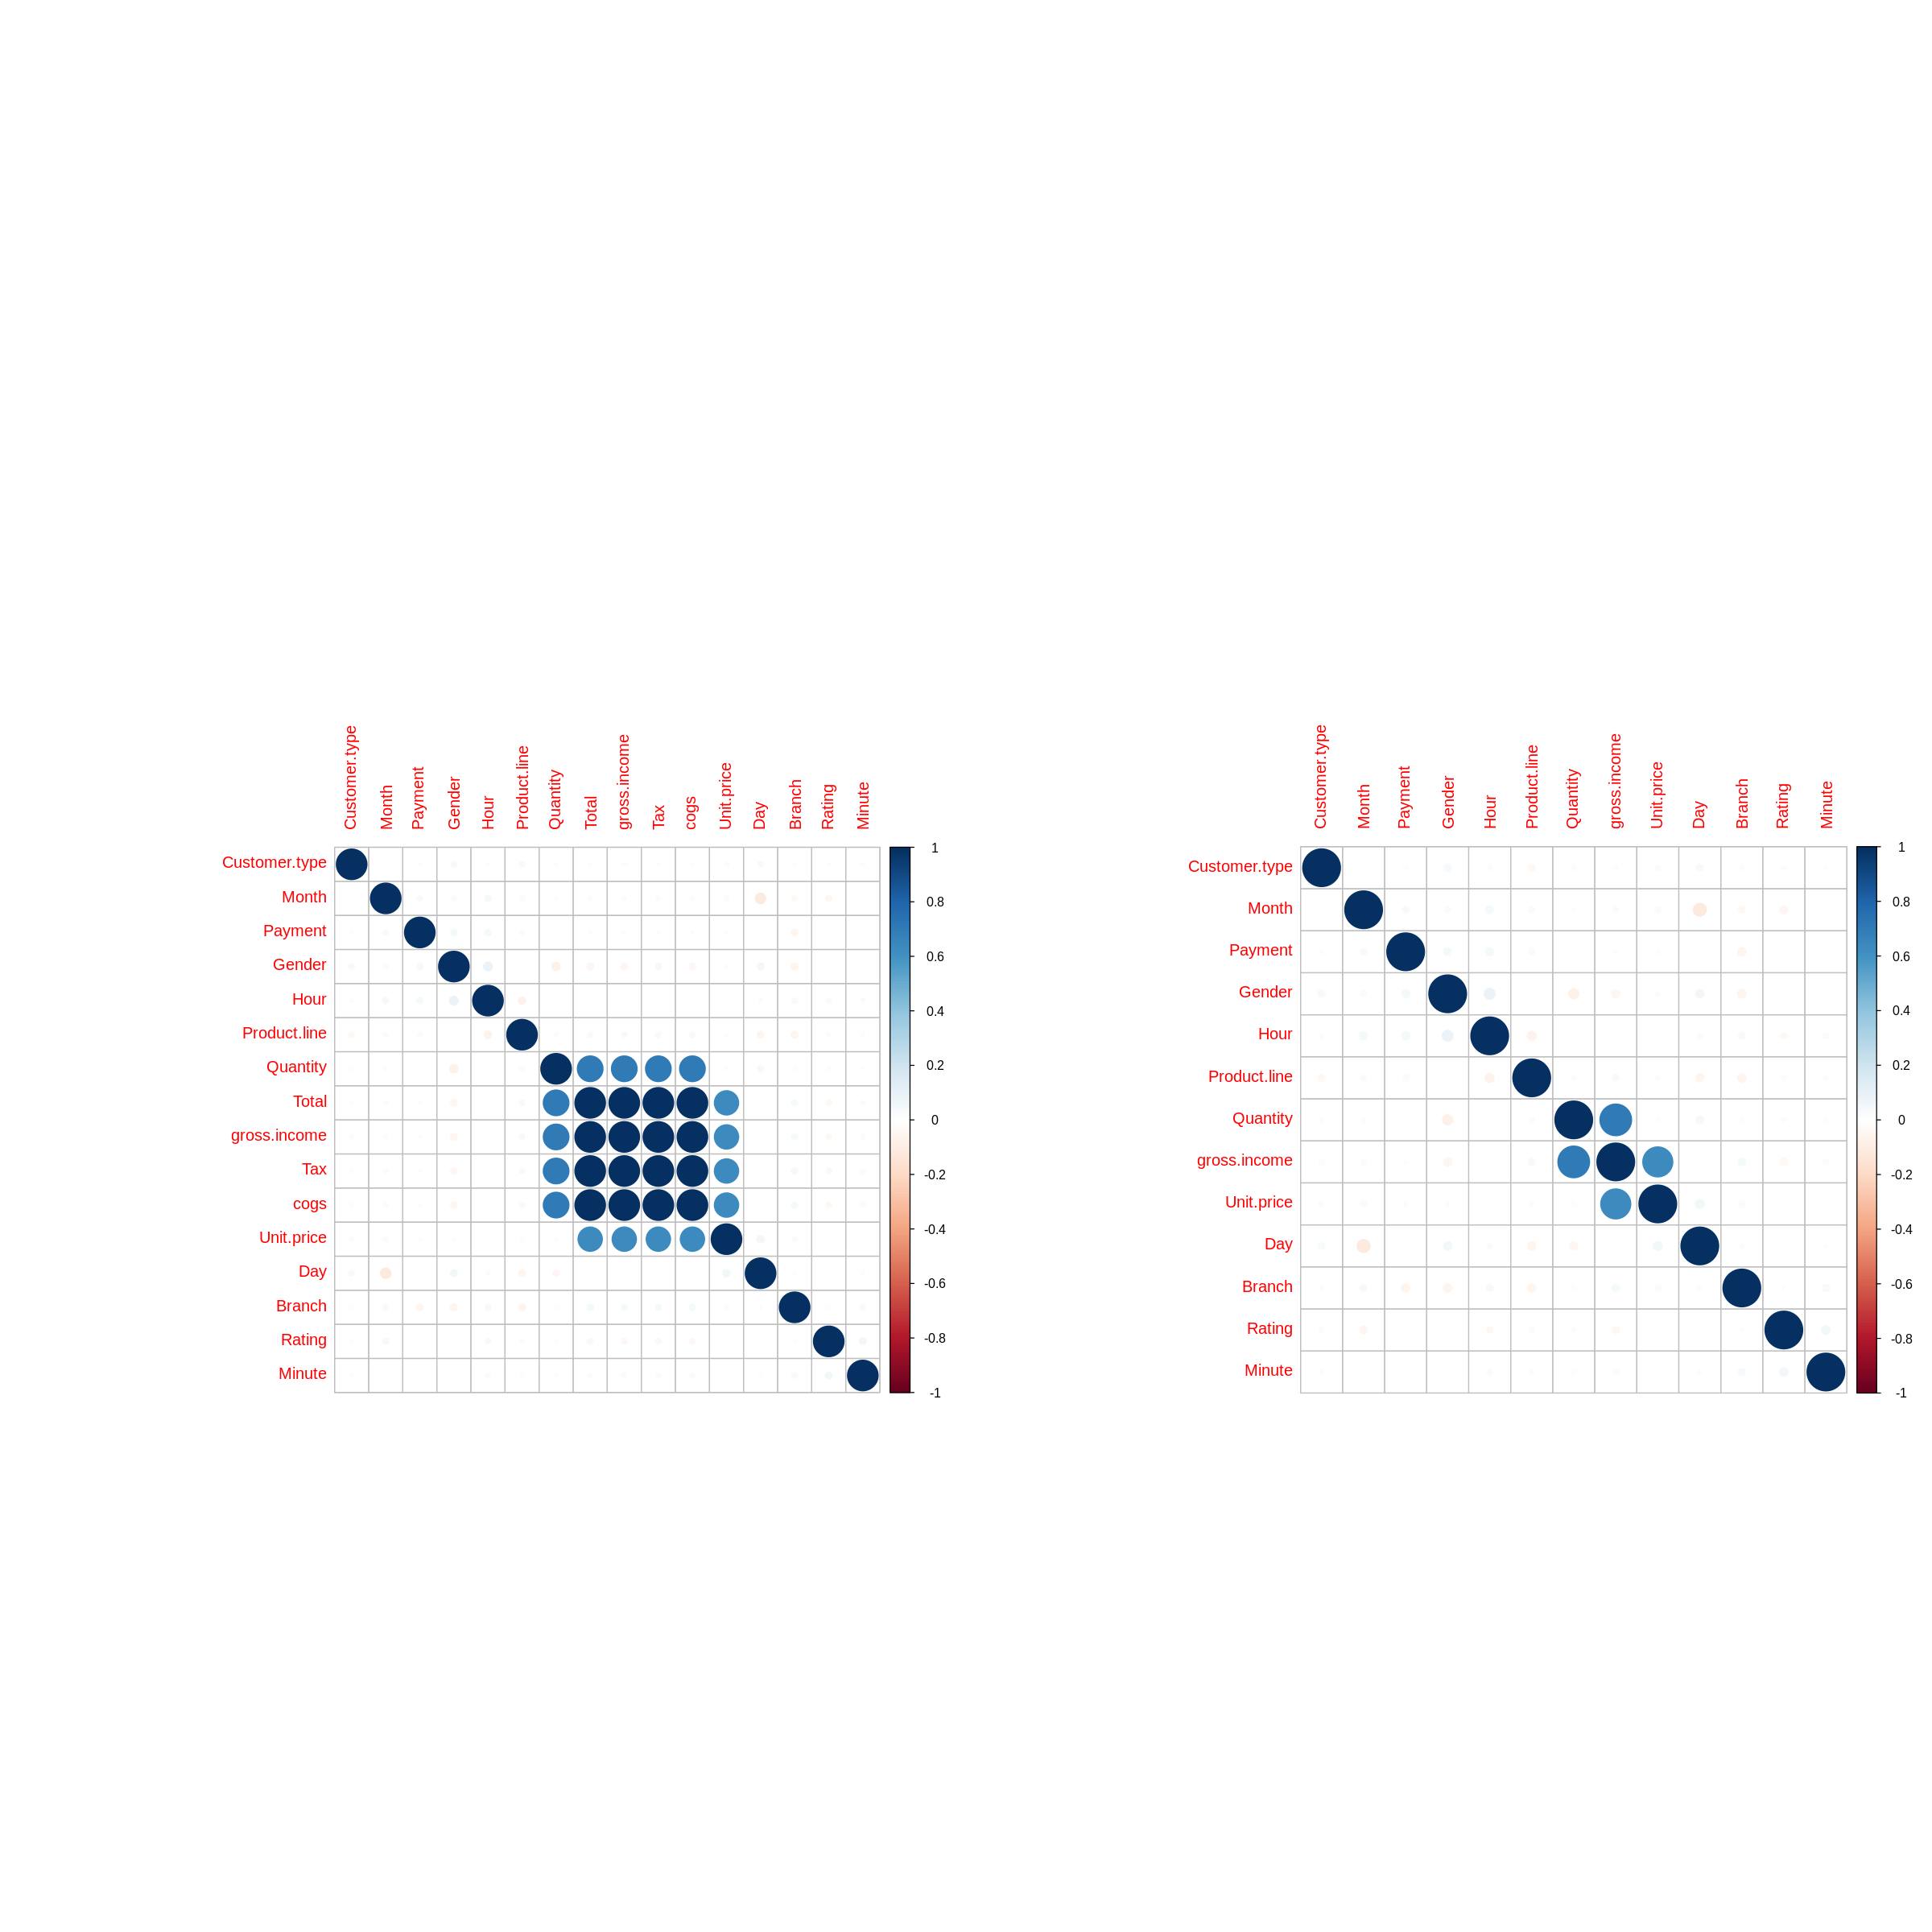

In [40]:
# Performing our graphical comparison
# ---
# 
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(data_filtered), order = "hclust")

##**Wrapper Method**

In [41]:
# Installing and loading our clustvarsel package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(clustvarsel, quietly=TRUE))
                install.packages("clustvarsel")))
                         
library(clustvarsel)


In [42]:
# Installing and loading our mclust package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(mclust, quietly=TRUE))
                install.packages("mclust")))
library(mclust)

In [43]:
#Previewing the data
head(data)

Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Day,Month,Year,Hour,Minute
<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
A,Member,Female,Health and beauty,74.69,7,26.1415,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,05,01,2019,13,08
C,Normal,Female,Electronic accessories,15.28,5,3.8200,Cash,76.40,4.761905,3.8200,9.6,80.2200,08,03,2019,10,29
A,Normal,Male,Home and lifestyle,46.33,7,16.2155,Credit card,324.31,4.761905,16.2155,7.4,340.5255,03,03,2019,13,23
A,Member,Male,Health and beauty,58.22,8,23.2880,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,27,01,2019,20,33
A,Normal,Male,Sports and travel,86.31,7,30.2085,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,08,02,2019,10,37
C,Normal,Male,Electronic accessories,85.39,7,29.8865,Ewallet,597.73,4.761905,29.8865,4.1,627.6165,25,03,2019,18,30


In [48]:
#Dropping columns that are not numeric
data_num1 <- data
data_num1$Branch <- NULL
data_num1$Customer.type <- NULL
data_num1$Gender <- NULL
data_num1$Product.line <- NULL
data_num1$Payment <- NULL
data_num1$Day <- NULL
data_num1$Month <- NULL
data_num1$Minute <- NULL
data_num1$Year <- NULL
data_num1$Hour <- NULL
data_num1$gross.margin.percentage <- NULL
head(data_num1)

Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74.69,7,26.1415,522.83,26.1415,9.1,548.9715
15.28,5,3.8200,76.40,3.8200,9.6,80.2200
46.33,7,16.2155,324.31,16.2155,7.4,340.5255
58.22,8,23.2880,465.76,23.2880,8.4,489.0480
86.31,7,30.2085,604.17,30.2085,5.3,634.3785
85.39,7,29.8865,597.73,29.8865,4.1,627.6165


In [49]:
#Checking the structure of the data
str(data_num1)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  7 variables:
 $ Unit.price  : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity    : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax         : num  26.14 3.82 16.22 23.29 30.21 ...
 $ cogs        : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.income: num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating      : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total       : num  549 80.2 340.5 489 634.4 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [60]:
#Scaling the data
data_sc <- scale(data_num1)

In [61]:
# Sequential forward greedy search (default)
# ---
#
out = clustvarsel(data_sc, G = 1:9)
out

------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step   BICclust Model G    BICdiff Decision
          Quantity          Add -2163.2454     E 9   687.4466 Accepted
             Total          Add 10162.9162   VEI 9 14495.1149 Accepted
        Unit.price          Add  -416.3552   EVV 8 -9234.5549 Rejected
             Total       Remove -2046.6406     E 9 14378.5101 Rejected

Selected subset: Quantity, Total

Quality and Total have been accepted while the other variables have been rejected.

In [62]:
out$subset

Quantity    Total 
       2        7

In [76]:
#Building a clustering model
Subset1 = data_sc[, out$subset]
mod = Mclust(Subset1, G = 1:9)
summary(mod)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEI (diagonal, equal shape) model with 9 components: 

 log-likelihood    n df      BIC      ICL
       5206.183 1000 36 10163.69 10157.91

Clustering table:
  1   2   3   4   5   6   7   8   9 
187 102  98  59 112  91  60 199  92 

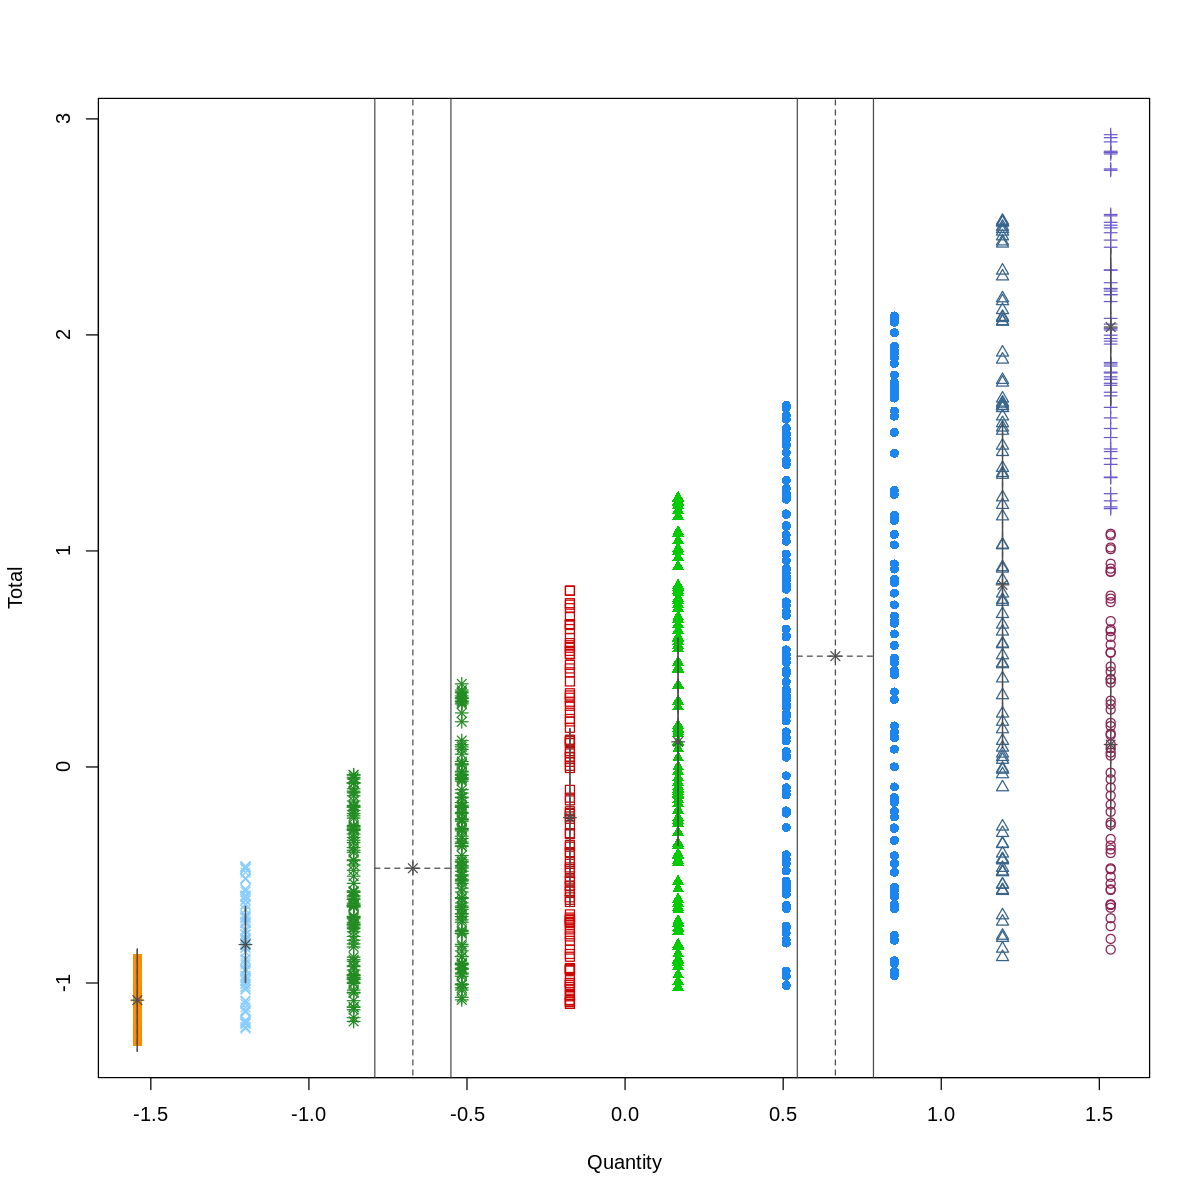

In [64]:
# plotting
options(repr.plot.width = 10, repr.plot.height = 10)
plot(mod ,c("classification"))

##**Embedded Method**

In [68]:
# We install and load our wskm package
# ---
#
suppressWarnings(
        suppressMessages(if
                         (!require(wskm, quietly=TRUE))
                install.packages("wskm")))
library(wskm)

set.seed(2)
model <- ewkm(data_num[1:16], 3, lambda=2, maxiter=1000)

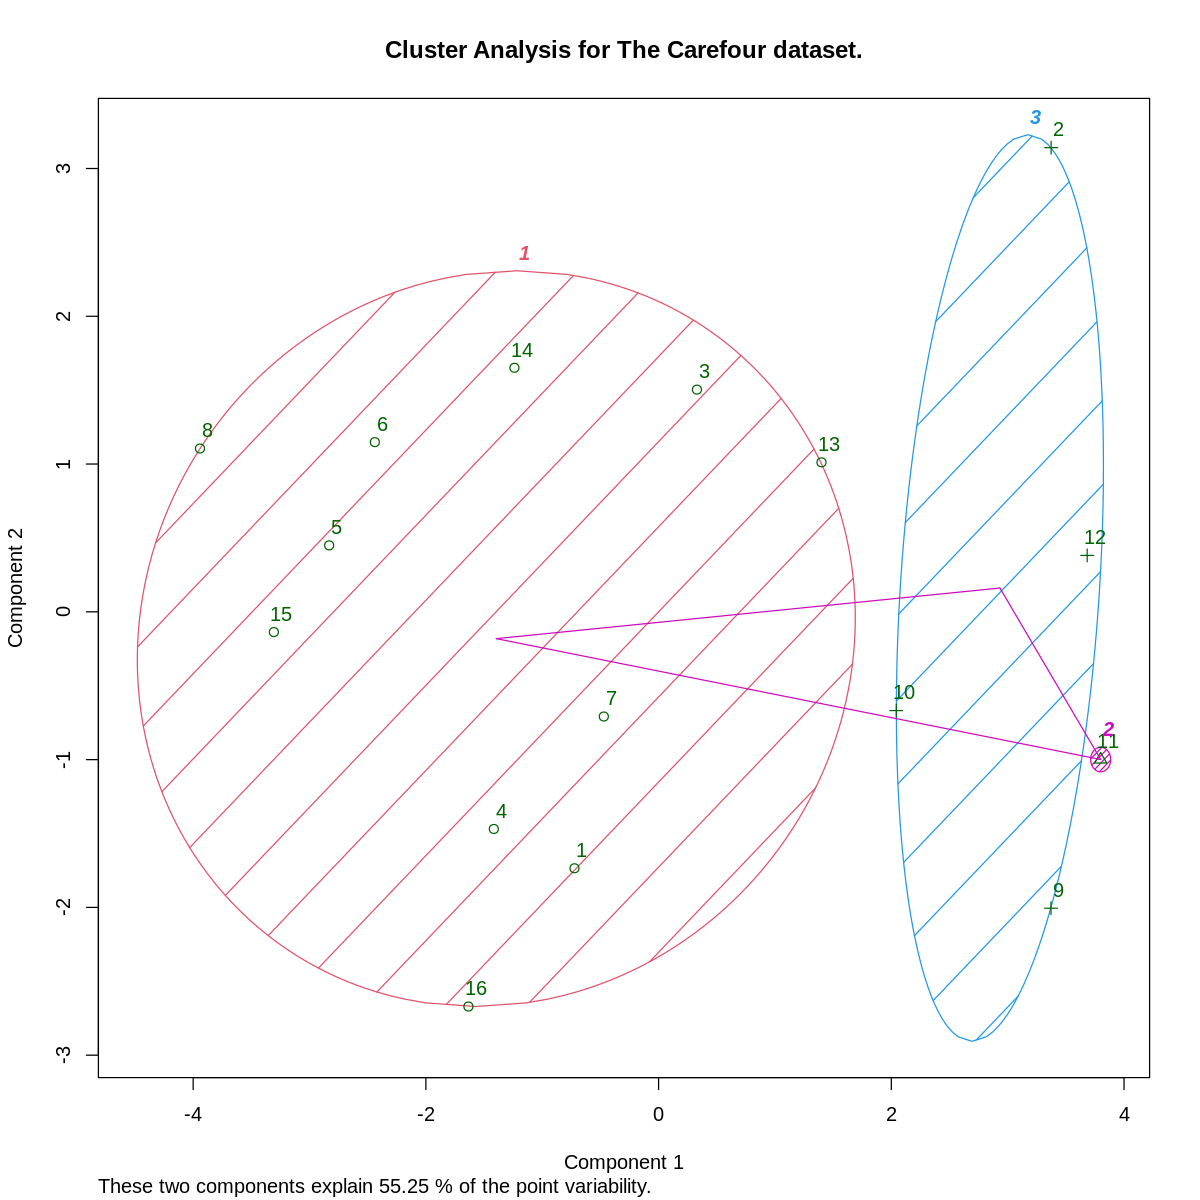

In [69]:
# Loading and installing our cluster package
suppressWarnings(
        suppressMessages(if
                         (!require(cluster, quietly=TRUE))
                install.packages("cluster")))
library("cluster")

# Cluster Plot against 1st 2 principal components
# ---
#
clusplot(data_num[1:16], model$cluster, color=TRUE, shade=TRUE,
         labels=2, lines=1,main='Cluster Analysis for The Carefour dataset.')

These two components explain 55.25% of the point variability.

In [70]:
#Checking the weights stored in the model.
round(model$weights*100,2)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total,Day,Month,Hour,Minute
1,5.29,42.77,39.05,0.00,0.00,0.00,0.00,5.29,0.00,0.00,0.00,0.00,0.00,7.60,0.00,0.00
2,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25,6.25
3,13.41,25.05,25.05,1.25,0.00,2.99,0.04,22.10,0.00,0.04,0.86,0.00,0.00,9.21,0.00,0.00


##**Feature Ranking**

In [71]:
# We install and load the required packages
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(FSelector, quietly=TRUE))
                install.packages("FSelector")))
library(FSelector)

In [72]:
# From the FSelector package, we use the correlation coefficient as a unit of valuation. 
Scores <- linear.correlation(data_num)
Scores

,attr_importance
,<dbl>
Customer.type,0.01960787
Gender,0.05631756
Product.line,0.05393756
Unit.price,0.02820244
Quantity,0.01596379
Tax,0.04104666
Payment,0.05010429
cogs,0.04104666
gross.income,0.04104666


In [73]:
# cutoff.k: The algorithms select a subset from a ranked attributes. 
# ---
#
Subset <- cutoff.k(Scores, 5)
as.data.frame(Subset)

Subset
<chr>
Gender
Product.line
Payment
Tax
cogs


In [74]:
Subset2 <-cutoff.k.percent(Scores, 0.4)
as.data.frame(Subset2)

Subset2
<chr>
Gender
Product.line
Payment
Tax
cogs
gross.income


In [75]:
Scores2 <- information.gain(data_num)

# Choosing Variables by cutoffSubset <- cutoff.k(Scores2, 5)
# ---
# 
Subset3 <- cutoff.k(Scores2, 5)
as.data.frame(Subset3)

Subset3
<chr>
Customer.type
Gender
Product.line
Unit.price
Quantity


Using feature ranking we find out that the variables that rank first(based on the correlation coefficient) are Customer.type, Gender and Product.line.

#**Conclusion and Recommendation**
From the above analysis we find out that Tax, cogs and gross.income are highly correlated variables and they may not give insights to the marketing department and hence the department shouild consider avoiding those variables when preparing data to be used for marketing purposes.